# Phys 349: Project Plant

## 1. Introduction

**Contributions**: Sam and Jordan wrote independent versions of the L-System code, Wilfred merged and optimized the code. Wilfred wrote the initial proposal, interim report and final report while Sam and Jordan reviewed and made edits. Sam coded case study #1 and Jordan coded case study #2 with some analysis. Wilfred integrated the code, helped with documentation and errors and added functionality to the analysis (plotting, optimization, etc). Everyone analyzed the code together. 

We aim to study the Lindenmayer System (L-System) to create fractals using geometric shapes, develop realistic-looking organisms, and find new fractal patterns. The L-system is a formal language developed by biologist Aristid Lindenmayer that uses the alphabet and production rules to recursively expand a string. It was originally introduced to model plant cell growth, and developed into a formal language that can generate self-similar fractals. The purpose of this project is two-fold.
First, to simulate the creation of realistic vegetation. This is useful for procedural generation of images such as in video games or CGI effects. Second, to experiment with rules to generate new and interesting patterns. More information can be found at https://en.wikipedia.org/wiki/L-system.

We write an algorithm to generate new, realistic plants by stochastically altering the known plant's rules. To generate new patterns, we use Fourier Analysis and statistics applied to known, realistic-looking plants. We search for new rules using the Fourier analysis by minimizing a goodness metric. The new, randomly generated structures are automatically developed, then go through a process of elimination if they do not meet the criteria developed through quantitative analysis of known plants. Our hypothesis is the following: there is structural symmetry in realistic-looking plants that can be found using Fourier Analysis and statistics, which can help us find new rules for plant simulation. 

## 2. Algorithm Review and Comparison

To visualize the system, a python package called Turtle is used. Turtle allows the user to create movies, and in our case, drawing of the L-Systems. Here, we will import the packages we need and show the merged code. 

The code uses a set of variables, constants (if any), an initial starting point (axiom) and a set of rules to recursively create the intended pattern. The variables will then be drawn and turned into shapes that we can analyze.
The parameters of the program are defined as such:
- variables: set of symbols that can be replaced by the rules
- constants: variables that are unaffected by rules applied
- axiom: initial starting point of the structure
- rules: rules that the recursion must follow

Both independently written versions of the code used the same algorithm and were combined into an Object-Oriented version that pulls elements from both. The user is able to choose what kind of L-System to draw using the LSystem class and then iterate as desired. The DrawFractal class inherits from the LSystem class and has methods that can draw fractals such as: 
- Koch Curve
- Sierpinski Triangle
- Dragon Curve
- Binary Fractal Tree
- Fractal plant

Both versions of the code differed only in coding preference. For instance, one used lists and included parameters as arguments to a class, and the other used dictionaries, and hard-coded the parameters into the class. Since the objective is to expand this to numerous case studies of rules, variables, axioms and such; we will use the arguments to input the parameters moving forward. We will also use dictionaries instead of lists as that allows for quicker access to the rules, instead of having to iterate through them each time. Below is a table with each fractal type and their corresponding parameters.


<table>
    <caption style="caption-side:bottom">Table 1: Parameters of Various Test Studies</caption>
    <tr>
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Fractal Type</th>
        <th scope="col" style="text-align: left;">Axiom</th>
        <th scope="col" style="text-align: left;">Constants</th>
        <th scope="col" style="text-align: left;">Variables</th>
        <th scope="col" style="text-align: left;">Rules</th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Koch Curve</th>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> +,  -</th>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> F &rarr;  F+F-F-F+F </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Sierpinski Triangle</th>
        <th scope="col" style="text-align: left;"> F-G-G </th>
        <th scope="col" style="text-align: left;"> +,  - </th>
        <th scope="col" style="text-align: left;"> F,  G </th>
        <th scope="col" style="text-align: left;"> F &rarr; F-G+F+G-F,  G &rarr; GG </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Binary Fractal Tree</th>
        <th scope="col" style="text-align: left;"> 0 </th>
        <th scope="col" style="text-align: left;"> [,  ] </th>
        <th scope="col" style="text-align: left;"> 0,  1 </th>
        <th scope="col" style="text-align: left;"> 0 &rarr; 1[0]0,  1 &rarr; 11 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Dragon Curve</th>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> +,  -  </th>
        <th scope="col" style="text-align: left;"> F,  G </th>
        <th scope="col" style="text-align: left;"> F &rarr; F+G,  G &rarr; F-G </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Fractal Plant</th>
        <th scope="col" style="text-align: left;"> X </th>
        <th scope="col" style="text-align: left;"> +,  -,  [,  ] </th>
        <th scope="col" style="text-align: left;"> X,  F </th>
        <th scope="col" style="text-align: left;"> X &rarr; F+[[X]-X]-F[-FX]+X,  F &rarr; FF </th>
    </tr>
</table>


In [3]:
# Import Section
import numpy as np
import turtle
from sys import platform
import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from IPython.core.display import HTML
from scipy.signal import find_peaks
import time #to check how long code run
start_time = time.time()

In [4]:
class LSystem(object):
    def __init__(self, A='F', C=['+', '-'], V=['F'], R={'F': [['F+F-F-F+F', 1.]]}, N=1):
        '''
        This function uses a given set of variables, constants, rules and an axiom to iterate lines which builds up on the previous one.

        Args:
            fractal_type:    type of fractal you wish to produce
            V:          string which contains all the variables. e.g. 'AB' for variables 'A' and 'B'
            C:          string which contains all the constants. e.g. '+-' for constants '+' and '-'
            A:          string which contains the initial state. e.g. 'A+B-AA'.
                                    Can only contain variables and constants characters.
            R:          list of strings which contains the rules for each constants in the order the constants
                                    are given, e.g. ['AA-', 'AB+-A'] for rule 'A' --> 'AA-' and rule 'B' --> 'AB+-A'.
                                    Note that there need to be as many rules as variables.
                                    Can only contain variables and constants characters.
            N: Number of iterations 
        output:
            None
        '''
        
        self.variables = V #separate the variables into list of one character strings
        self.const = C #separate the constants into list of one character strings
        self.axiom = A #separate the axiom into list of one character strings
        self.rules = R #separate rules into list of list of one character strings
        self.current = self.axiom
        self.N = N # Number of growth iterations
        self.bmax = self.count_brackets() # Dict of max number of branching for each possible rule
        self.prob_arrays = self.create_prob_arrays()
        
        print('Fractal Initiated!')
        
    def create_prob_arrays(self):
        '''
        Determines the probabilities for each degree of branching and each rule
        Args:
            None
        Returns:
            Probability array (ndarray) : probability table with rules as columns and degree of branching as rows (in ascending order)
        '''
        prob_arrays = self.rules.copy()
        
        # loop through the rules
        for s in self.rules.keys():
            possible_rules = self.rules[s] # the possible rules for a given var      
            pstart = np.zeros(len(possible_rules)) # initially all other rules are 0 percent
            pstart[0] = 1. # original rule has 100 percent prob
            plist = np.array(possible_rules)[:, 1].astype(float) # get rule max probabilities
            
            if self.bmax < 0:
                ps = plist # no branches
            else:
                ps = np.linspace(pstart, plist, max(self.bmax, 1) * self.N) # probability table for a given var
            
            prob_arrays[s] = ps # set to that level
        
        return prob_arrays
    
    
    def determine_rule(self, s, b):
        '''
        Determine which stochastic rule is selected for the next generation. 
        Args:
            s (int) : index of current degree of branching
            b (int) : degree of branching
        Returns:
            rule (Str) : rule for next generation
        '''
        possible_rules = self.rules[s]
        prob_arrays = self.prob_arrays[s]
        
        if b > len(prob_arrays) - 1:
            print('b > length of array!')
            
            print(len(prob_arrays) - 1)
            print(b)
            print(min(b, len(prob_arrays)-1))
            
        select = min(b, len(prob_arrays)-1) # To ensure it doesn't select an index greater than the length
        curr_probs = prob_arrays[select] # get the probability associated with the DOB 
        
        # add the probabilities to choose a given rule -- more likely to choose higher ranked rules
        p_tot = 0.
        rand = np.random.uniform(0, 1)

        for i, p in enumerate(curr_probs):
            # add probabilities 
            p_tot += float(p)
            if p_tot > rand: # select the rule
                rule = possible_rules[i][0]      
                break
        
        return rule
    
    
    def count_brackets(self):
        '''
        Determine the maximum branching by way of counting the number of open brackets
        Args:
            None
        Returns: 
            b_max (int) : number of open brackets at any given time
        '''
        bmax = 0
        # loop through each variable in the rules
        for var in self.rules.keys():
            possible_rules = self.rules[var] # dict of rules for each variable
            var_bmax = 0
            
            # loop through the possible rules
            for r in possible_rules:
                b = 0
                
                # loop through each rule string and count the number of open brackets at a given time
                for string in r[0]:
                    if string == '[':
                        b += 1
                    if string == ']':
                        b -= 1
                    if b > var_bmax:
                        var_bmax = b
                        
                # get the maximum bmax regardless of variable 
                if var_bmax > bmax:
                    bmax = var_bmax
                    
        return bmax
        
    def grow_my_child(self):
        '''
        Grow the fractal by n iterations (starts at 1)
        Args:
            N: Number of iterations to grow the fractal
        Returns:
            LSystem string after N iterations
        '''
        for i in range(self.N):
            next_plant = ''
            b = 0
            for s in self.current:
                # Since we have multiple options with various probabilities, need to
                # determine what the options are and randomly select a rule according
                # to the probabilities.
                
                if s == '[':
                    b += 1
                elif s == ']':
                    b -= 1
                    
                if s in self.rules.keys():
                    # determine which rule to use stochastically
                    s_new = self.determine_rule(s, b=b)

                # if it is in the constants list, then add it to the new plant
                elif s in self.const:
                    s_new = s
                    
                else:
                    print('A MUTATION HAS OCCURED! \n\INITATING SEQUENCE: SELF DESTRUCT\n')
                    break
                next_plant += s_new

            # set current plant as the next one
            self.current = next_plant
            
        print('Done growing!')
        return self.current

In [5]:
class DrawFractal(LSystem):
    '''
    Draw a fractal at a given stage of its iterations
    '''
    def __init__(self, current_iter, fractal_type='fractal plant', length=10, angle=25, movie=False, a=0, pos=(0, -350)):
        '''
        Initialize and draw the corresponding LSytem. Inherits from the LSystem class in case we need to continue growing the plant
        after drawing it. 
        Args:
            current_iter: the current string to draw
            fractal_type: the type of LSystem we are trying to draw
            length: length of the line drawn
            angle: angle for the turtle to turn
            movie (Bool): True if you want to see the animation being drawn
        '''
        self.pos=pos
        self.current_iter = current_iter
        self.length = length
        self.angle = angle
        self.a = a
        self.fractal_type = fractal_type
        wn = turtle.Screen() # create a space just for Hilbert (Hilbert's Space)
        turtle.screensize(canvwidth=100, canvheight=700)
        turtle.tracer(movie) # turn off animation
        
        # turtle sometimes throws weird errors, this will fix
        try:
            self.hilbert = turtle.Turtle()
        except:
            self.hilbert = turtle.Turtle()  
        
        # set the speed on Hilbert(the turtle)
        self.hilbert.speed(0)
        self.hilbert.shape('turtle')
        if movie:
            self.hilbert.color('green')
        
        self.plot_my_child()
        
        wn.exitonclick() # turtle error
        
    def plot_my_child(self):
        '''
        Draw the corresponding fractal type
        '''
        if self.fractal_type == 'koch curve':
            self.koch_curve()
        
        elif self.fractal_type == 'fractal tree':
            self.fractal_tree()
        
        elif self.fractal_type == 'fractal plant':
            self.fractal_plant()
            
        elif self.fractal_type == 'sierpinski triangle':
            self.sierpinski_triangle()
            
        elif self.fractal_type == 'dragon':
            self.dragon()
            
        else:
            print('PICK A VALID FRACTAL')
            return
        
    def koch_curve(self):
        '''
        Draw the koch curve based on the current iteration
        '''
        self.hilbert.setheading(0) #start by drawing right
        self.hilbert.penup() #pen does not draw on canvas in that state, but does move
        self.hilbert.setposition(-250, -250) #start from bottom left of page
        self.hilbert.pendown() #pen draws on canvas in that state

        for i, s in enumerate(self.current_iter):

            if s == 'F': # move forward
                self.hilbert.pendown()
                self.hilbert.forward(self.length)
                self.hilbert.penup()

            if s == '+': # turn left
                self.hilbert.left(self.angle)

            if s == '-': # turn right
                self.hilbert.right(self.angle)

    def fractal_tree(self):
        '''
        Draw the Binary Fractal Tree based on the current iteration
        '''

        self.hilbert.setheading(90) #start by drawing up
        self.hilbert.penup() #pen does not draw on canvas in that state, but does move
        self.hilbert.setposition(0, -250) #start from bottom centre of page
        self.hilbert.pendown() #pen draws on canvas in that state
        position_save = []
        angle_save = []

        for i, s in enumerate(self.current_iter):
            
            if s == '0' or s == '1': # move forward
                self.hilbert.pendown()
                self.hilbert.forward(self.length)
                self.hilbert.penup()
                
            elif s == '[': # save the location of Hilbert
                self.hilbert.left(self.angle)
                position_save.append(self.hilbert.position())
                angle_save.append(self.hilbert.heading())
                
            elif s == ']': # return to last saved position, remove it and turn 2*angle
                self.hilbert.setposition(position_save.pop())
                self.hilbert.setheading(angle_save.pop())
                self.hilbert.right(2*self.angle)


    def fractal_plant(self):
        '''
        Draw the realistic looking fractal plant based on current iteration
        '''
        # print(self.current_iter)
        self.hilbert.setheading(90) #start by drawing up
        self.hilbert.penup() #pen does not draw on canvas in that state, but does move
        self.hilbert.setposition(self.pos[0], self.pos[1]) #start from bottom centre of page
        self.hilbert.pendown() #pen draws on canvas in that state
        position_save = []
        angle_save = []
        
        b_ang = -1 # Bracket counter for angle stochasticity starts at -1 
        for i, s in enumerate(self.current_iter):
            if s == 'F':
                self.hilbert.pendown()
                self.hilbert.forward(self.length)
                self.hilbert.penup()

            elif s == '[':
                b_ang += 1
                position_save.append(self.hilbert.position())
                angle_save.append(self.hilbert.heading())

            elif s == ']':
                b_ang -= 1
                self.hilbert.setposition(position_save.pop()) #remove last saved position once used
                self.hilbert.setheading(angle_save.pop()) #remove last saved angle once used
                
            elif s == '+': # turn by a certain angle
                std = self.a * (1 - np.exp(- (b_ang + 1) ))
                angle_rand = np.random.normal(loc=self.angle, scale=std, size=1)
                self.hilbert.left(angle_rand)

            elif s == '-':
                std = self.a * (1 - np.exp(- (b_ang + 1) ))
                angle_rand = np.random.normal(loc=self.angle, scale=std, size=1)
                self.hilbert.right(angle_rand)


    def sierpinski_triangle(self):
        '''
        Draw the Sierpinski Triangle based on current iteration
        '''
        self.hilbert.setheading(0) #start by drawing right
        self.hilbert.penup() #pen does not draw on canvas in that state, but does move
        self.hilbert.setposition(-250, 250) #start from top left of page
        self.hilbert.pendown() #pen draws on canvas in that state

        for i, s in enumerate(self.current_iter):

            if s == 'F' or s == 'G':
                self.hilbert.pendown()
                self.hilbert.forward(self.length)
                self.hilbert.penup()

            elif s == '+':
                self.hilbert.left(self.angle)

            elif s == '-':
                self.hilbert.right(self.angle)
        
    def dragon(self):
        '''
        Draw the Dragon Curve based on current iteration
        '''
        self.hilbert.setheading(0) #start by drawing right
        self.hilbert.penup() #pen does not draw on canvas in that state, but does move
        self.hilbert.setposition(0, 0) #start from top left of page
        self.hilbert.pendown() #pen draws on canvas in that state

        for i, s in enumerate(self.current_iter):
            if s == 'F':
                self.hilbert.pendown()
                self.hilbert.forward(self.length*2/3)
                self.hilbert.penup()
            elif s == 'G':
                self.hilbert.pendown()
                self.hilbert.forward(self.length*2/3)
                self.hilbert.penup()
            elif s == '+':
                self.hilbert.left(self.angle/2)
                self.hilbert.pendown()
                self.hilbert.forward(self.length*np.sqrt(2)/3)
                self.hilbert.penup()
                self.hilbert.left(self.angle/2)
            elif s == '-':
                self.hilbert.right(self.angle/2)
                self.hilbert.pendown()
                self.hilbert.forward(self.length*np.sqrt(2)/3)
                self.hilbert.penup()
                self.hilbert.right(self.angle/2)

## 3. Test Studies

In our test studies, we attempt to recreate simple test cases found through https://en.wikipedia.org/wiki/L-system.

### Test 1: The Sierpinski Triangle.

In [ ]:
triangle = LSystem(V=['F', 'G'], C=['+', '-'], A='F-G-G', R={'F': [['F-G+F+G-F', 1.]], 'G': [['GG', 1.]]}, N=4)
grown_up = triangle.grow_my_child()

drawing = DrawFractal(current_iter=grown_up, fractal_type='sierpinski triangle', length=10, angle=120)

Fractal Initiated!
Done growing!


Comparison: For 4 iterations, our code produced Fig. 1.
<figure>
  <img src="code_triangle.png" alt="Code Produced Sierpinski Triangle" style="width:25%">
  <figcaption>Fig. 1 - Sierpinski Triangle produced by our code</figcaption>
</figure>
We can compare to the analytic case found in Wikipedia, in Fig. 2.
<figure>
  <img src="analytic_4_iter_triangle.png" alt="Analytic Sierpinski Triangle" style="width:25%">
  <figcaption>Fig. 1 - Analytic Sierpinski Triangle</figcaption>
</figure>

We see that each side length of the large triangle produced by the code is the same as the analytic solution. Thus, this test is verified.

### Test 2: Koch Curve

In [ ]:
koch = LSystem(V=['F'], C=['+', '-'], A='F', R={'F': [['F+F-F-F+F', 1.]]}, N=3)
grown_up = koch.grow_my_child()

drawing = DrawFractal(current_iter=grown_up, fractal_type='koch curve', length=10, angle=90)

Comparison: For 3 iterations, our code produced Fig. 3.
<figure>
  <img src="code_koch_curve.png" alt="Code Produced Koch Curve" style="width:25%">
  <figcaption>Fig. 3 - Koch Curve produced by our code</figcaption>
</figure>

We can compare to the analytic case found in Wikipedia, in Fig. 4.
<figure>
  <img src="Koch 3.png" alt="Analytic Koch Curve" style="width:25%">
  <figcaption>Fig. 4 - Analytic Koch Curve</figcaption>
</figure>

We see that the pattern is reproduced exactly, verifying yet another test case.

Other test cases we have reproduced can be found in the following cells. The first one will also run a movie of turtle drawing the pattern.

In [ ]:
## Dragon Curve
dragon = LSystem(V=['F', 'G'], C=['+', '-'], A='F', R={'F': [['F+G', 1.]], 'G': [['F-G', 1.]]}, N=8)
grown_up = dragon.grow_my_child()

drawing = DrawFractal(current_iter=grown_up, fractal_type='dragon', length=10, angle=90, movie=True)

In [ ]:
## Binary Fractal Tree
BFP = LSystem(V=['0', '1'], C=['[', ']'], A='0', R={'1': [['11', 1.]], '0': [['1[0]0', 1.]]}, N=6)
grown_up = BFP.grow_my_child()

drawing = DrawFractal(current_iter=grown_up, fractal_type='fractal tree', length=10, angle=45)

In [7]:
## Fractal Plant
FP = LSystem(V=['X', 'F'], C=['+', '-', '[', ']'], A='X', R={'X': [['F+[[X]-X]-F[-FX]+X', 1.]], 'F': [['FF', 1.]]}, N=4)
grown_up = FP.grow_my_child()

drawing = DrawFractal(current_iter=grown_up, fractal_type='fractal plant', length=10, angle=25, a=0)

Fractal Initiated!
Done growing!


## Case Studies

Now that the code is verified and working, we are able to add more interesting pieces and analyze them. We have changed our application cases from the project proposal slightly to follow a more quantitative path, and consequently a more structured report. We plan on introducing a mutation into the creation process that stochastically activates as the plant grows, to observe how the mutation affects the plant. The stochastic process will follow a Metropolis algorithm, except as a function of how many branches have occurred rather than energy and temperature. 

The next step in this project is to develop analysis code that can Fourier transform the strings output by the L-System. We will use Fourier analysis to decipher any patterns, then randomly perturb the basic patterns found to see if they produce viable realistic looking plants. If we are not able to produce realistic looking plants, then we can rule out that these patterns are the only necessary requirements to simulate new plants. 

## Case Study #1: Stochastic Mutations

The following part will focus on the mutations of known plants. We will first replicate the plants shown in Fig. 5 and then modify them using stochasticity and randomness in various ways.

### Testing the Replication of Known Plants

<figure>
  <img src="replicated_plants.png" alt="Figure 1.24 from ABOP" style="width:50%">
  <figcaption>Fig. 5 - Replicated plants shown in Figure 1.24 of ABOP with no stochasticity or variations</figcaption>
</figure>

For comparison, we replicate each plant with thinner line widths. 

In [6]:
# Helper functions to have shorter code
def fig_plants(A, V, rules, angles, a, stoch):
    '''
    Draw the plants more easily. Click on the window to progress to the next plant.
    Args:
        A (Str) : axiom
        V (listof Str) : Variables
        rules (listof Dict) : list of dictionaries that represent the rules for each plant
        angles (listof float) : original angles of each plant
        a (float) : stochasticity constant
        stoch (Str) : stochastic type being applied -- need for different lengths to fit on screen
    Returns:
        None
    '''
    # Constants that don't change throughout the examples
    C = ['+', '-', '[', ']'] # Constants
    
    for i in range(len(rules)):
        
        # fiddle with line lengths so that the images fit on the screen
        if len(V) < 2: # plants a - c
            if i < 2: #plants a, b
                N = 5
                length = 10
                if i == 0: # plant a 
                    if stoch == 'angle':
                        length = 2.5
                    elif stoch == 'rules':
                        length = 5
            else:
                N = 4
                length = 10
                
        else: # plants d - f
            if i < 2: # plants d, e
                N = 7
                if stoch == 'angle':
                    length = 2.5
                elif stoch == 'rules':
                    length = 7
            else: # plant f
                N = 5
                length = 8

        fig = LSystem(V=V, C=C, A=A, R=rules[i], N=N)
        grown_up = fig.grow_my_child()

        drawing = DrawFractal(current_iter=grown_up, 
                              fractal_type='fractal plant', 
                              length=length, 
                              angle=angles[i],
                              a=a)
        
def grid_img(filename, title):
    images = []
    for img_path in glob.glob(filename):
        images.append(mpimg.imread(img_path))

    plt.figure(figsize=(10,10))
    titles = [r'a : 25.7 deg', r'b : 20 deg', r'c : 22.5 deg', r'd : 20 deg', r'e : 25.7 deg', r'f : 22.5 deg']

    for i, image in enumerate(images):
        plt.subplot(2, 3, i+1)
        plt.title(titles[i])
        plt.imshow(image)
        plt.axis('off')

    plt.suptitle(title, y=-1e-10)
    plt.show()

In [7]:
# Original rules

# Stochasticity constant -- none
a = 0

# Figures a - c have the same axiom and variables
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
rules = [{'F': [['F[+F]F[-F]F', 1.]]}, \
         {'F': [['F[+F]F[-F][F]', 1.]]}, \
         {'F': [['FF-[-F+F+F]+[+F-F-F]', 1.]]} ] # Rule set with probabilities
angles = [25.7, 20, 22.5] # Branching angles

fig_plants(A, V, rules, angles, a, stoch='angle')
    
# Figures d - f have the same axiom and variables
A = 'X' # Axiom
V = ['F', 'X'] # Variables subject to rules
rules = [{'F': [['FF', 1.]], \
          'X': [['F[+X]F[-X]+X', 1.]]}, \
         
         {'F': [['FF', 1.]], \
          'X': [['F[+X][-X]FX', 1.]]}, \
         
         {'F': [['FF', 1.]], \
          'X': [['F-[[X]+X]+F[+FX]-X', 1.]]} ] # Rule set with probabilities
angles = [20, 25.7, 22.5] # Branching angle 

fig_plants(A, V, rules, angles, a, stoch='angle')

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!


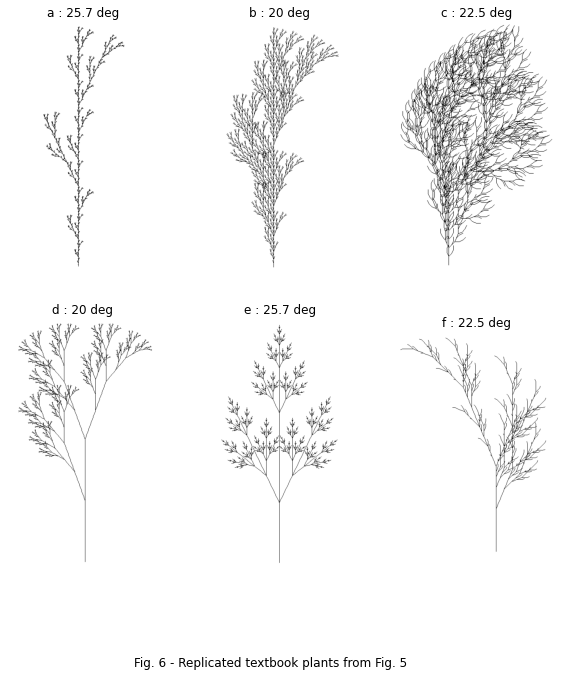

In [8]:
grid_img('fig 124*.png', 'Fig. 6 - Replicated textbook plants from Fig. 5')
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: top;
    }
    </style>
    """)

The image produced is identical to the textbook's only differing in line width.

### Modifying the Angle of the branches 

Next up, we will demonstrate the effect of stochastically modifying the drawing angle. Originally the angle stays constant which creates self repeating patterns that mimic vegetation. A naive way to create plants that look similar is to modify their drawing angles based on which branch we are on. This is determined by the number of open brackets that the drawing tool finds itself in, and we call it the degree of branching, $b$.

The degree of branching for the deviation in the angle is determined when drawing each straight line by counting how many open brackets appear before the character in the string.

For example, when drawing '+' in the string ' F[+F]F ': $b = 1$.

When drawing '+' in the string ' F[F[+]F-] ', $b = 2$ but for the '-' character, $b = 1$.

The idea behind this is to increase the randomness more intensely deeper in the sub-branches to ensure that the general structure of the plant appears similar to the original structure, but the finer details looks more random. To do this, we use a normally distributed angle around the original with increasing standard deviation depending on the degree of branching. The standard deviation is calculated by:

$$\text{std} = a \times (1-e^{-b})$$

where $b$ is the degree of branching (before any brackets, $b=0$) and $a$ is a positive stochasticity constant. $a = 0$ represents no stochasticity and thus the original image. Using this method, the standard deviation increases substantially per degree of branching. 

Below is an example of the same plants from Fig. 5, using $a=10$, to demonstrate the effect outlined. All other variables remain the same.

In [9]:
# Stochastically altering the angle

# Stochasticity Constant
a = 10

# Figures a - c have the same axiom and variables
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
rules = [{'F': [['F[+F]F[-F]F', 1.]]}, \
         {'F': [['F[+F]F[-F][F]', 1.]]}, \
         {'F': [['FF-[-F+F+F]+[+F-F-F]', 1.]]} ] # Rule set with probabilities
angles = [25.7, 20, 22.5] # Branching angles

fig_plants(A, V, rules, angles, a, stoch='angle')
    
# Figures d - f have the same axiom and variables
A = 'X' # Axiom
V = ['F', 'X'] # Variables subject to rules
rules = [{'F': [['FF', 1.]], \
          'X': [['F[+X]F[-X]+X', 1.]]}, \
         
         {'F': [['FF', 1.]], \
          'X': [['F[+X][-X]FX', 1.]]}, \
         
         {'F': [['FF', 1.]], \
          'X': [['F-[[X]+X]+F[+FX]-X', 1.]]} ] # Rule set with probabilities
angles = [20, 25.7, 22.5] # Branching angle 

fig_plants(A, V, rules, angles, a, stoch='angle')

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!


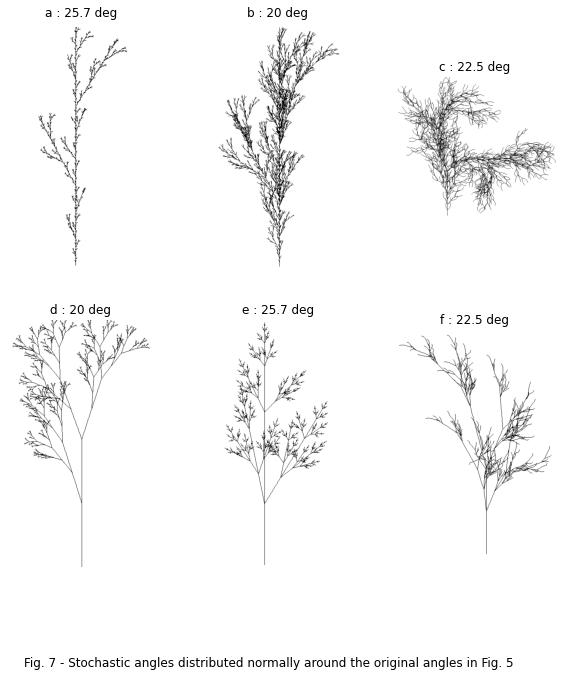

In [10]:
grid_img('stoch ang fig *.png', 'Fig. 7 - Stochastic angles distributed normally around the original angles in Fig. 5')
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: top;
    }
    </style>
    """)

As we can see, this generates an interesting alternative to the original rules, which is less geometrically consistent and often more realistic. We find a stochastic constant of $a=4$ to $a=10$ yields good results for simulating plants.

### Stochastically Altering the Rules

A more realistic way to simulate plants is by stochastically altering the rules governing the growth of the plant, often explained by exterior environmental factors. We are able to do this by providing several possible rules with different probabilities.

Instead of setting constant probabilities associated to each possible rule, we thought it would be more realistic that each sub-branching would have increasing probabilities to deviate from the original rule. Thus, it would be based on the degree of branching (DOB), similar to as before. The degree of branching can range from 0 (the initial branch) to $\text{DOB}_{\text{max}}$. $\text{DOB}_{\text{max}}$ is determined based on the number of growth iterations, $N$, and the maximum number of open brackets that any single character might be in, $b_{\text{max}}$. $b_{\text{max}}$ is chosen based on which rule has the most open brackets before a self-repeating variable is reached.

$$\text{DOB}_{\text{max}} = b_{\text{max}} \times N$$

In our case of the simple plants, we alter our rules such that each variable now has multiple possible outcomes with their associated maximum probabilities. There is some constraints on the program, as the probabilities must sum to 1, but the distribution of the probabilities can vary amongst the possible rules. 

The first rule given for each variable is assumed to be the original rule, and when DOB = 0, the probability of the first rule is 1, with zero probability for all other rules. At $\text{DOB}_{\text{max}}$, the probability distribution is given by that specified in the set of rules, i.e. each rule has their maximum probabilities. 

Between $DOB=0$ and $DOB_{\text{max}}$, the distribution gradually shifts using numpy linspace, ensuring the total probability is always exactly 1. 

As an analytic example, we can take the following table as a possible set of rules:
<table>
    <caption style="caption-side:bottom">Table 2: Possible Rules for Variable F</caption>
    <tr>
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Variable</th>
        <th scope="col" style="text-align: left;">Rules</th>
        <th scope="col" style="text-align: left;">Probabilities</th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> F[+F]F[-F]F </th>
        <th scope="col" style="text-align: left;"> 0.5</th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> F[+F][-F]F </th>
        <th scope="col" style="text-align: left;"> 0.3 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> F[+F-F]F[-F+F] </th>
        <th scope="col" style="text-align: left;"> 0.2 </th>
    </tr>
</table>

If we use 5 growth iterations, then $\text{DOB}_{\text{max}} = 5$ as there is only one open bracket for the variable F in each of the rules. The probability table for the above example is then: 

<table>
    <caption style="caption-side:bottom">Table 2: Possible Rules for Variable F</caption>
    <tr>
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">DOB Level</th>
        <th scope="col" style="text-align: left;">Rule 1 Probability </th>
        <th scope="col" style="text-align: left;">Rule 2 Probability </th>
        <th scope="col" style="text-align: left;">Rule 3 Probability </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">1</th>
        <th scope="col" style="text-align: left;"> 1.0 </th>
        <th scope="col" style="text-align: left;"> 0.0 </th>
        <th scope="col" style="text-align: left;"> 0.0 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">2</th>
        <th scope="col" style="text-align: left;"> 0.875 </th>
        <th scope="col" style="text-align: left;"> 0.075 </th>
        <th scope="col" style="text-align: left;"> 0.05 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">3</th>
        <th scope="col" style="text-align: left;"> 0.75 </th>
        <th scope="col" style="text-align: left;"> 0.15 </th>
        <th scope="col" style="text-align: left;"> 0.10 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">4</th>
        <th scope="col" style="text-align: left;"> 0.625 </th>
        <th scope="col" style="text-align: left;"> 0.225 </th>
        <th scope="col" style="text-align: left;"> 0.15 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">5</th>
        <th scope="col" style="text-align: left;"> 0.50 </th>
        <th scope="col" style="text-align: left;"> 0.30 </th>
        <th scope="col" style="text-align: left;"> 0.20 </th>
    </tr>
</table>

As there are an infinite number of rules that a variable can obey, we choose to focus on simpler examples to demonstrate the power of our code. The code can easily be adapted to include a function that creates rules for each variable, thus developing even more randomly generated plants. 

In the following code, we apply the above modified rules to plants found in Figure 5. For the plants with multiple variables, the same can be done, just simply creating new rules for the new variables.

In [ ]:
# Stochastically altering the rules

# Stochasticity Constant - none here
a = 0

# Figures a - c have the same axiom and variables
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
rules = [{'F': [['F[+F]F[-F]F', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]}, \
         
         {'F': [['F[+F]F[-F][F]', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]}, \
         
         {'F': [['FF-[-F+F+F]+[+F-F-F]', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]} ] # Rule set with probabilities
angles = [25.7, 20, 22.5] # Branching angles

fig_plants(A, V, rules, angles, a, stoch='rules')

# Figures d - f have the same axiom and variables
A = 'X' # Axiom
V = ['F', 'X'] # Variables subject to rules
rules = [{'F': [['FF', 0.5], \
                ['F[X]', 0.5]], \
          'X': [['F[+X]F[-X]+X', 0.5], \
                ['F[+FX]-X', 0.5]]}, \
         
         {'F': [['FF', 0.5], \
                ['F[X]', 0.5]], \
          'X': [['F[+X][-X]FX', 0.5], \
                ['F[+FX]-X', 0.5]]}, \
         
         {'F': [['FF', 0.5], \
                ['F[X]', 0.5]], \
          'X': [['F-[[X]+X]+F[+FX]-X', 0.5], \
                ['F[+FX]-X', 0.5]]} ] # Rule set with probabilities
angles = [20, 25.7, 22.5] # Branching angle 

fig_plants(A, V, rules, angles, a, stoch='rules')

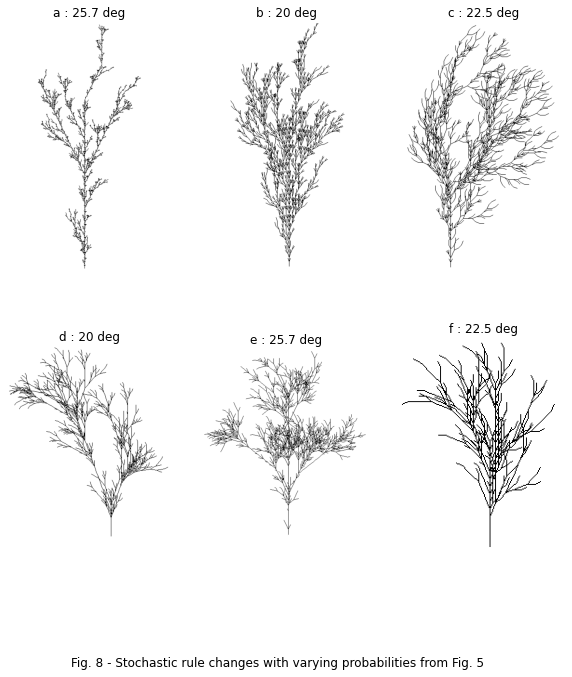

In [11]:
grid_img('stoch rule fig*.png', 'Fig. 8 - Stochastic rule changes with varying probabilities from Fig. 5')
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: top;
    }
    </style>
    """)

Figure 8 shows an example of possible configurations from stochastically changing the rules. They significantly differ from the initial versions shown in Figure 5, but they look more realistic! The additional rules and probabilities were created based on intuition, but they can be changed to represent a multitude of factors that affect a plant's growth. 

Now, we can combine both stochastic processes to see what happens!

In [12]:
# Combined Stochasticity 

# Stochasticity Constant
a = 10

# Figures a - c have the same axiom and variables
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
rules = [{'F': [['F[+F]F[-F]F', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]}, \
         
         {'F': [['F[+F]F[-F][F]', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]}, \
         
         {'F': [['FF-[-F+F+F]+[+F-F-F]', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]} ] # Rule set with probabilities
angles = [25.7, 20, 22.5] # Branching angles

fig_plants(A, V, rules, angles, a, stoch='rules')

# Figures d - f have the same axiom and variables
A = 'X' # Axiom
V = ['F', 'X'] # Variables subject to rules
rules = [{'F': [['FF', 0.75], \
                ['F[X]', 0.25]], \
          'X': [['F[+X]F[-X]+X', 0.75], \
                ['F[+FX]-X', 0.25]]}, \
         
         {'F': [['FF', 0.75], \
                ['F[X]', 0.25]], \
          'X': [['F[+X][-X]FX', 0.75], \
                ['F[+FX]-X', 0.25]]}, \
         
         {'F': [['FF', 0.75], \
                ['F[X]', 0.25]], \
          'X': [['F-[[X]+X]+F[+FX]-X', 0.75], \
                ['F[+FX]-X', 0.25]]} ] # Rule set with probabilities
angles = [20, 25.7, 22.5] # Branching angle 

fig_plants(A, V, rules, angles, a, stoch='angle')

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!


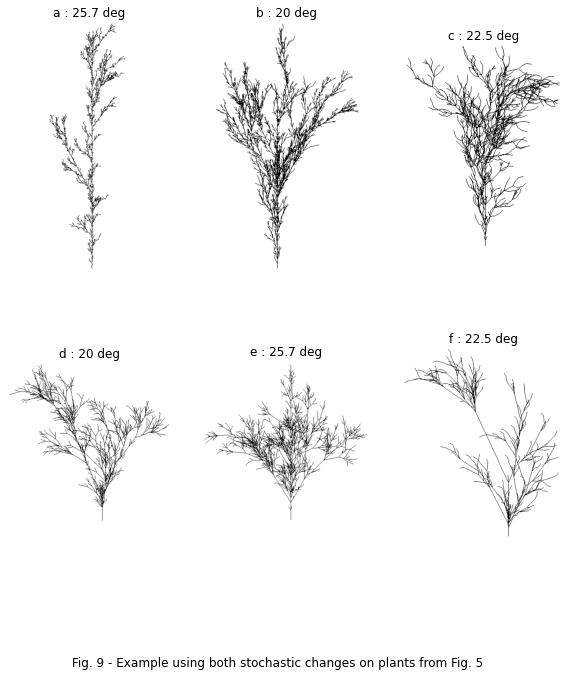

In [13]:
grid_img('stoch both fig *.png', 'Fig. 9 - Example using both stochastic changes on plants from Fig. 5')
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: top;
    }
    </style>
    """)

### Remarks for Case Study #1: The addition of stochastic processess 
We can see that this produces even more unique plants, as the two stochastic processes combined ensure that each plant is impossible to replicate. These would be invaluable for video games or movie graphics, when a large number of plants of the same 'type' are needed. While only using the turtle package and drawing 2D images for our project, the speed of developing random plants that look similar and realistic is still very fast. This is necessary in procedural generation, especially in 3D scenarios and as such, the combined stochastic processes provides a solution for the procedural generation of self replicating objects.

## Case Study #2: Fourier Analysis

The use of Discrete Fourier Transforms on the self repeating transforms can help us determine if there are patterns that occur in the sequence and if these patterns can quantitatively describe realistic looking vegetation.

In [14]:
def Fourier(sequence):
    '''
    Take a sequence generated by L_system function, break it apart and assign numbers to each symbols,
    then take a fourier transform of it to analyse patterns in the sequence.
    We assign a number to a given element. Plants only have characters X, F, G, +, -, [, ]
    So we assign characters as the following: X = 0, F = 1, G = 2, + = 3, - = 4, [ = 5, ] = 6
    
    Args:
        sequence (str) : single string contaning the sequence to be analysed, generated by L_system function. 
    Returns:
        steps (ndarray) : return 1D array of steps between 0-1 to normalize the results of the fourier transform (use as x_axis on plots)
        new_seq (1D array) : L-system sequence rewritten as a sequence of numbers
        fft_seq (ndarray): contains the fourier transform of the new_seq array
    '''
    new_seq = list(sequence) # convert to list of characters

    # assign each element a value: each element gets a value even if it isn't in the sequence to compare them
    characters = list('XFG+-[]')
    for i in range(len(characters)):
        new_seq = np.char.replace(new_seq, characters[i], f"{i}")
    
    new_seq = new_seq.astype(int) # convert to integers
    
    #take fourier transform:
    fft_seq = np.fft.fft(new_seq)

    #define the step size so the the string is normalized between 0 and 1 to make analysis easier
    steps = np.linspace(0, 1, new_seq.shape[0]) #note that steps are frequency since normalized to 1.
    
    return steps, new_seq, fft_seq

def Fourier_plot(sequence, elements, title, ax, plot_values=False, Real=False, Imag=False, Power=True):
    '''
    Plot the Fourier transform or actual values of the L-System sequence
    Args:
        sequence (str) : L-system sequence to analyze
        elements (listof str) : possible elements in the sequence
        plot_values (Bool) : Plot the corresponding integer values of the sequence
        Real (Bool) : Plot the real values of the Fourier transform
        Imag (Bool) : Plot the imaginary values of the Fourier transform
        Power (Bool) : Plot the Power Spectrum of the Fourier transform
    Returns:
        None
    
    '''
    x_axis_steps, int_seq, fft_seq = Fourier(sequence)

    if plot_values:
        #plot values
        ax.plot(x_axis_steps, int_seq, ls='', color='blue', marker='o', label=elements)
        ax.set_title(title, y=-0.01)
        ax.set_xlabel("Normalized steps")
        ax.set_ylabel("Corresponding elements as integers")
        ax.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
        plt.show()

    #plt Fourier of values
    if Real:
        ax.plot(x_axis_steps, fft_seq.real, ls='', color='blue', marker='.', label='Real')
    if Imag:
        ax.plot(x_axis_steps, fft_seq.imag, ls='', color='red', marker='x', label='Imaginary')
    if Power:
        ax.plot(x_axis_steps[1:], np.sqrt( fft_seq[1:].imag**2 + fft_seq[1:].real**2 ), ls='', color='green', marker='.', label='Power')
    if Real or Imag or Power:
        ax.legend(loc="upper right", bbox_to_anchor=(0.999, 1))
        ax.set_title(title, y=-0.2)
        ax.set_ylabel("Fourier transform values")
        ax.set_xlabel("Normalized Steps")
        

### Simple Cases for Fourier Spectrums

#### 1. Alternating 2 Characters

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!


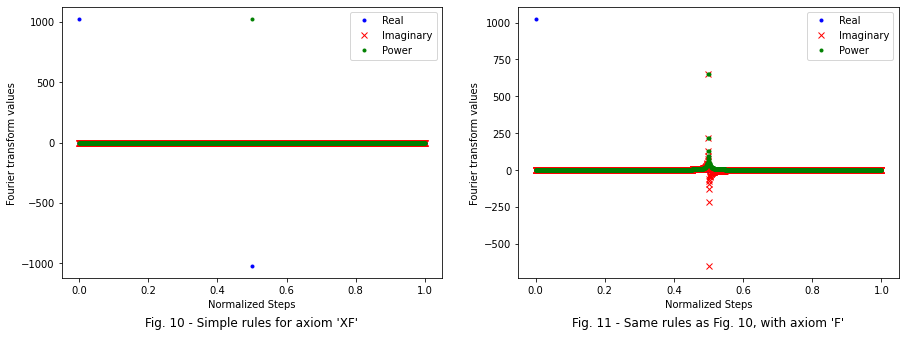

In [15]:
#Analyse the Results of the Fourier function
fig, axs = plt.subplots(1, 2, figsize=(15,5))

#see repeating sequence of 2 values:
elems = ['X', 'F']
test_1a = LSystem(A='XF', C='X', V='F', R={"F" : [['FXF', 1.]]}, N=10)  #XFXFXFXF
test_1a = test_1a.grow_my_child()

# Try with a different initial character
test_1b = LSystem(A='F', C='X', V='F', R={"F" : [['FXF', 1.]]}, N=10)  #XFXFXFXF
test_1b = test_1b.grow_my_child()

# Fourier Transform Plots
Fourier_plot(test_1a, elems, title="Fig. 10 - Simple rules for axiom 'XF'", ax=axs[0], Real=True, Imag=True, Power=True)
Fourier_plot(test_1b, elems, title="Fig. 11 - Same rules as Fig. 10, with axiom 'F'", ax=axs[1], Real=True, Imag=True, Power=True)

For simple sequence of two alternating characters, the peak in the power spectrum happens at a frequency of 0.5. There are $N=2$ elements with $l=1$ for both F and X, so indeed we should see a frequency of $\frac{l}{N} = \frac{1}{2}$. We note that the Fourier spectrum looks very different depending on if the sequence starts with X or F. However, the power spectrum appears to converge to the same graph, independent of the initial element. Thus, we will use the power spectrum in our later analysis. 

Furthermore, we note that the Fourier spectrum converges on sharper peaks for longer sequences. This is important as the plants that we will analyze have many thousands of characters in their sequence, thus their peaks will be sharper and better for analysis! It is also important to note that the first value of the Fourier spectrum is simply a sum of all the elements from the sequence. Thus, it will not be plotted in the power spectrum since each element is given an arbitrary value. However, we can use this fact later to normalize the power spectrums relative to that sum. 

#### 2. Alternating 3 and 4 Characters

We now try more compicated 3 and 4 element systems to further understand the Fourier analysis.

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!


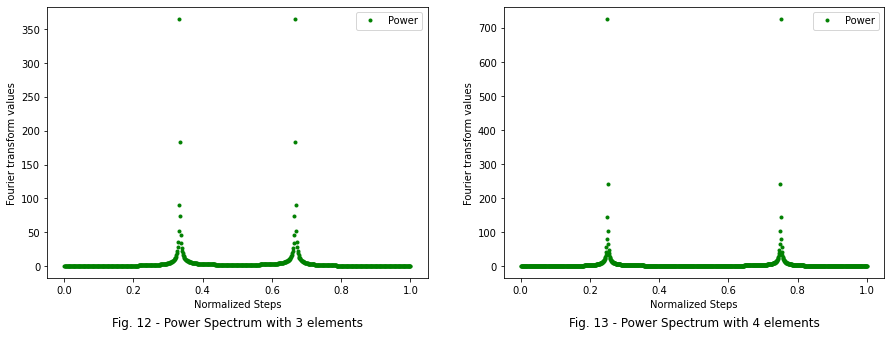

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

#repeating 3 values sequence:
elems = ['X', 'G', 'F']
test_1c = LSystem(N=8, V='F', C='XG', A='F', R={"F" : [['FXGF', 1.]]}) #simple test 3
test_1c = test_1c.grow_my_child()
Fourier_plot(test_1c, elems, title="Fig. 12 - Power Spectrum with 3 elements", ax=axs[0])

#repeating 4 values sequence:
elems = ['X', 'G', 'F', '+']
test_1d = LSystem(N=8, V='F', C='XG+', A='F', R={"F" : [['FXG+F', 1.]]}) #simple test 4
test_1d = test_1d.grow_my_child()
Fourier_plot(test_1d, elems, title="Fig. 13 - Power Spectrum with 4 elements", ax=axs[1])

Fig. 12 shows the power spectrum for a repeating pattern of $N=3$ elements, each with $l=1$. The frequency of the peak that will appear in the power spectrum is then $\frac{l}{N}=\frac{1}{3}=0.33$. Similarly, Fig 13 shows an alternating 4 element sequence with peak at frequency $\frac{l}{N}=\frac{1}{4}=0.25$, as expected. We note that the power spectrum peaks are mirrored about the $f=0.5$ point, i.e. the Nyquist Frequency. The frequencies after $f=0.5$ are integer multiples of the frequency before $f=0.5$, thus the second half of the spectrum will hold no new information about the sequence and only the first half of the power spectrum will be analyzed. 

These are very simple repeating sequences that are most likely not representative of true L-Systems. Let's take a look at some more complicated sequences to see if more patterns arise! 

#### 3. More Complicated Repeating Patterns

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!


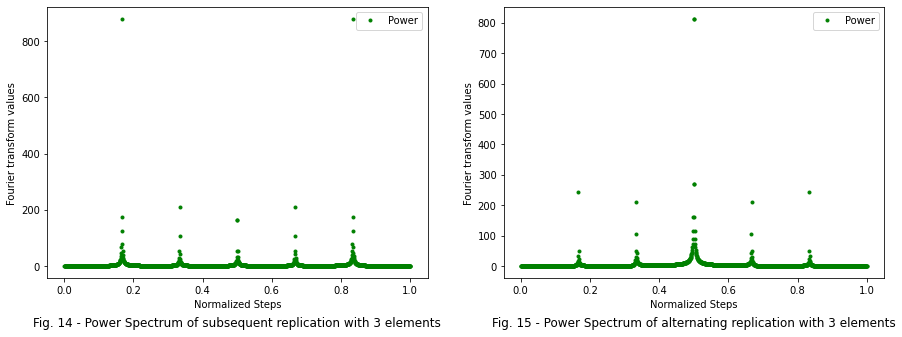

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Rule has subsequent constant replication 
elems = ['X', 'G', 'F',]
test_1e = LSystem(N=8, V='F', C='XG', A='F', R={"F" : [['FXXGGGF', 1.]]}) #simple test 5
test_1e = test_1e.grow_my_child()
Fourier_plot(test_1e, elems, title="Fig. 14 - Power Spectrum of subsequent replication with 3 elements", ax=axs[0])

# Rule has same frequency but non-subsequent constant replication
test_1f = LSystem(N=8, V='F', C='XG', A='F', R={"F" : [['FGXGXGF', 1.]]}) #simple test 6
test_1f = test_1f.grow_my_child()
Fourier_plot(test_1f, elems, title="Fig. 15 - Power Spectrum of alternating replication with 3 elements", ax=axs[1])

Each governing rule has 6 new characters for each variable, i.e. FXXGGG and FGXGXG. Thus, we have $N=6$ new characters, with $l=1$ for element F, $l=2$ for element X and $l=3$ for element G. These correspond to the frequencies that we see on the power spectrums in Fig. 14 and 15, i.e. $f_1=1/6$, $f_2=2/6$ and $f_3=3/6$.

While the rules are the essentially the same, only differing in the placement of the constants, we see that the height of the peaks between Fig. 14 and 15 are different. This demonstrates that more complicated patterns of sequences can be analyzed using Fourier spectrums and that the information of the repeating pattern itself is encoded in both the frequency and the heights of the peaks. We will use both of these characteristics in the analysis of much more complicated L-Systems that arise from creating plants. 

### Analysis of the Plant Examples from ABOP

The plants shown in Fig. 5 provide a great starting point to analyze multiple complicated systems using Fourier transforms. We will create the plants and then analyze them here.

In [18]:
def create_plants():
    C = ['+', '-', '[', ']'] # Constants
    N = 5 # constant number of iteration for comparison
    plants = []
    elements = []
    rules = [{'F': [['F[+F]F[-F]F', 1.]]}, \
             {'F': [['F[+F]F[-F][F]', 1.]]}, \
             {'F': [['FF-[-F+F+F]+[+F-F-F]', 1.]]}, \
             
             {'F': [['FF', 1.]], \
              'X': [['F[+X]F[-X]+X', 1.]]}, \
         
             {'F': [['FF', 1.]], \
              'X': [['F[+X][-X]FX', 1.]]}, \
         
             {'F': [['FF', 1.]], \
              'X': [['F-[[X]+X]+F[+FX]-X', 1.]]}] # Rule set with probabilities
    
    for i in range(len(rules)):
        
        if i < 3 :
            A = 'F' # Axiom
            V = ['F'] # Variables subject to rules
        else:
            A = 'X'
            V = ['F', 'X']
            
        elems = V + C
        elements.append(elems)
        
        fig = LSystem(V=V, C=C, A=A, R=rules[i], N=N)
        grown_up = fig.grow_my_child()
        plants.append(grown_up)
        
    return plants, elements

In [19]:
plants, elements = create_plants()

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!


#### 1. Look at the Fourier Transform of the Plants

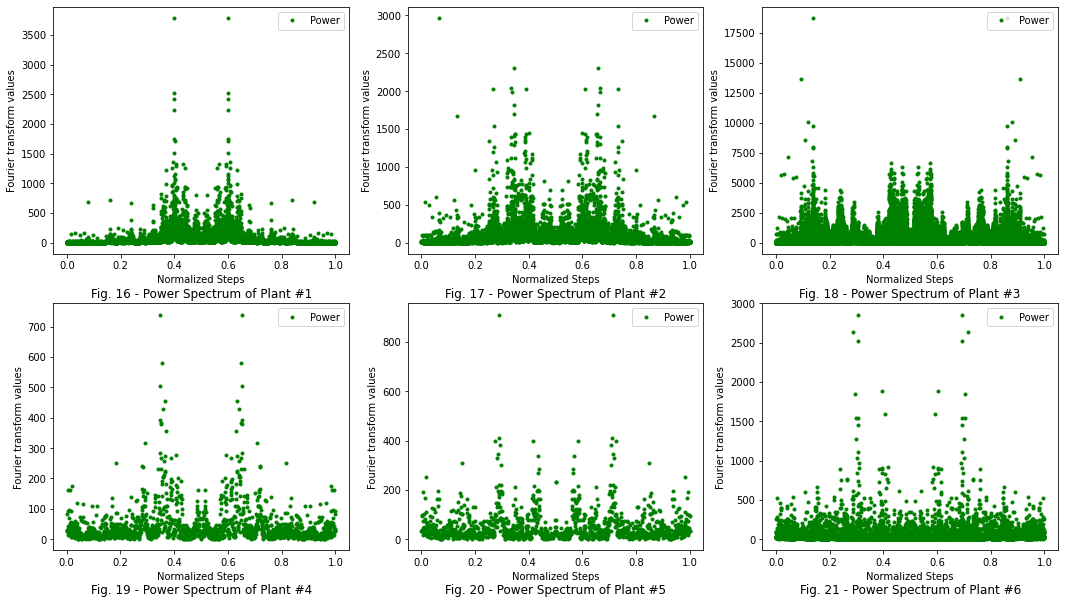

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(18,10))
for i in range(len(plants)):
    plant = plants[i]
    elem = elements[i]
    Fourier_plot(plant, elem, title=f"Fig. {16+i} - Power Spectrum of Plant #{i+1}", ax=axs.flat[i])

The power spectrums shown in Figs. 16 - 21 vary based on the plant generated, but each has a set of relevant concentrations of peaks. The pattern in these peaks is difficult to see by eye, but we can develop some code to find their positions and heights!

#### 2. Automate the Analysis of Power Spectrums 

To analyze each of the plant examples, we want to look at the relevant peak frequencies and their heights. We can do so by using a moving average of the peak y-values and a peak finder method. From Figs 16 - 21, we expect the power spectrums to have many peaks, especially such that the 'concentration' of peaks have many different single point peaks. For the longer sequences with many of these peaks, this is very difficult to analyze. We use the Scipy peak finder and define a minimum distance between peaks such that each of the power spectrums will have ~30-100 peaks found. This is still quite a bit to analyze, so the next step is to perform a smooting average so that the concentration of peaks have closer height values and resemble a more simple, large peak. The peak finder is then used again with distance such that only ~10 relevant peak concentrations are found. The 4 highest peak concentrations can then be selected (why 4? This will be explained later). We also return the ratios of the elements in the sequence but it isn't necessary to analyze these ratios, as they are simply a reflection of the ratios in the input rule for the variable. 

In [21]:
def moving_avg(input_array):
    '''
    Takes the moving average of input 1D array with 2 step in each direction. The boundary are cyclical in the calculation.
    Args:
        input_array: 1D array to smoothen
    Returns:
        output_array: 1D output smoothened array
    '''
    input_array_left = np.roll(input_array,1,axis=0)
    input_array_right = np.roll(input_array,-1,axis=0)

    output_array = (input_array_left + input_array + input_array_right)/3
    return output_array

# find the peaks
def analysis_peak_finder(sequence, elems, title='', fig=None, outer=None, plots=False):
    '''
    Finds the peaks in a given sequence.
    Args:
        sequence (str) : L-System string after a number of iterations
        elems (listof str) : elements that exist in the sequence
        plots (bool) : plot the relevant peaks in a cleaner way
    Returns:
        ratios (ndarray) : ratio for each element to the total number of elements in the sequence
        new_peak_table (ndarray) : 4 most prominent peaks in the power spectrum
    '''
    x_axis, values, fft_seq = Fourier(sequence) #get the fourier spectrum
    power = np.sqrt( fft_seq.imag**2 + fft_seq.real**2 ) #calculate the power
    sum_all = power[0] #get sum
    power_norm = power/sum_all #Normalize the fourier to the sum for analysis

    # get ratio of value to total number of elements in the sequence
    ratios = np.array([np.count_nonzero(values == i)/values.shape[0] for i in range(7)])

    # remove 1st value and 2nd half of fourier data since redundent info
    power_norm_cut = power_norm[1:int(len(power_norm)/2)]
    x_axis_cut = x_axis[1:int(len(power_norm)/2)]
    
    # Find peaks with Scipy
    peaks = find_peaks(power_norm_cut, height=1/100, distance=0.01*len(power_norm_cut)) #select 100 pts from spectrum
    
    # heigh acts like minimum threshold, ok to use since all values normalized
    # distance allows to select ~100 peaks per power spectrum

    peaks_x = []
    peaks_y = []
    for i in range(len(peaks[0])):
        peaks_x.append(x_axis_cut[peaks[0][i]])
        peaks_y.append(power_norm_cut[peaks[0][i]])
    
    peaks_y_smooth = moving_avg(peaks_y) #do smoothing average of peaks

    # Find the peaks in the smoothend set of peaks:
    peaks_smooth = find_peaks(peaks_y_smooth, height=1/1000) # select roughly 10 peaks
    peaks_x_smooth = []
    peaks_y_smooth_found = []
    for i in range(len(peaks_smooth[0])):
        peaks_x_smooth.append(peaks_x[peaks_smooth[0][i]])
        peaks_y_smooth_found.append(peaks_y_smooth[peaks_smooth[0][i]])

    # Save only the 4 most prominent peaks
    peak_table = np.column_stack((peaks_x_smooth, peaks_y_smooth_found))
    new_peak_table = peak_table[np.argsort(-peak_table[:,1])[:4]]

    if plots:
        inner = gridspec.GridSpecFromSubplotSpec(1, 2, \
                    subplot_spec=outer, wspace=0.2, hspace=0.1)
        
        ax1 = plt.Subplot(fig, inner[0])
        ax1.plot(x_axis_cut, power_norm_cut, ls='-', color='blue', marker='')
        ax1.plot(peaks_x, peaks_y, ls='', color='red', marker='.', markersize=7)
        fig.add_subplot(ax1)
        
        ax2 = plt.Subplot(fig, inner[1])
        ax2.plot(peaks_x, peaks_y_smooth, ls='-', color='green', marker='', markersize=7)    
        ax2.plot(peaks_x_smooth, peaks_y_smooth_found, ls='', color='magenta', marker='.', markersize=7)
        fig.add_subplot(ax2)
        
        ax1.set_title(title, y=-0.15, loc='left')

    return ratios, new_peak_table

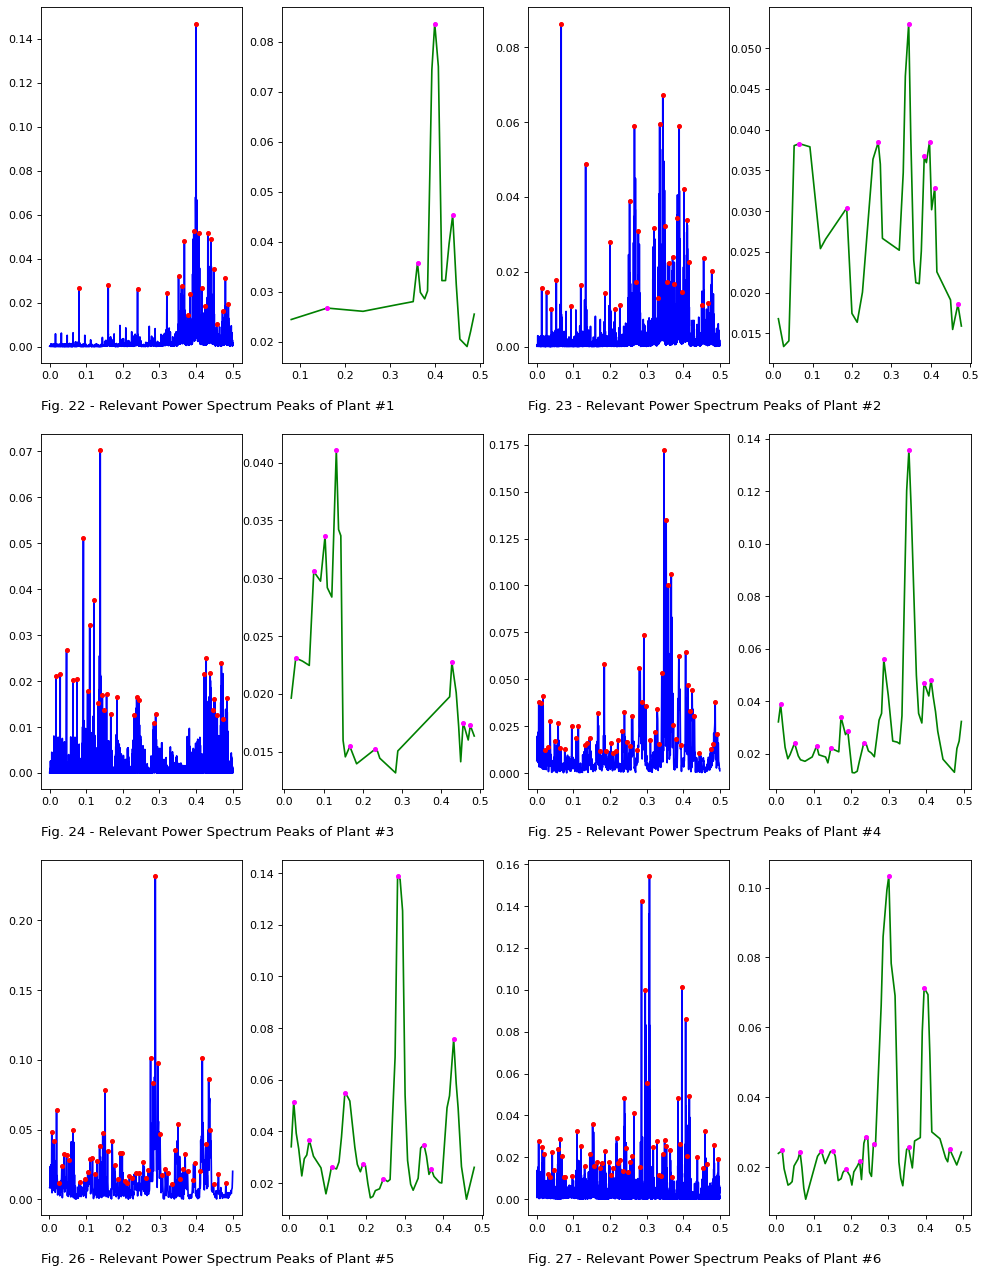

In [22]:
fig = plt.figure(figsize=(15, 20), dpi=80)
outer = gridspec.GridSpec(3, 2, wspace=0.1, hspace=0.2)

# Use analysis for the plants to show plots
for i in range(len(plants)):
    plant = plants[i]
    elem = elements[i]
    ratios, peaks = analysis_peak_finder(plant, elem, title=f"Fig. {22+i} - Relevant Power Spectrum Peaks of Plant #{i+1}", \
                                         fig=fig, outer=outer[i], plots=True)

From Figs. 22 - 27, the power spectrum is shown on the left in blue with extracted peaks as the red dots. After the moving average is performed, the plots on the right show the averaging in green. The peak finder is used again to find the concentrations of peaks in pink. This method of analysis allows us to reduce a complex spectrum down to a set of 4 peaks!

#### 4. Compare the peaks of all 6 plants qualitatively

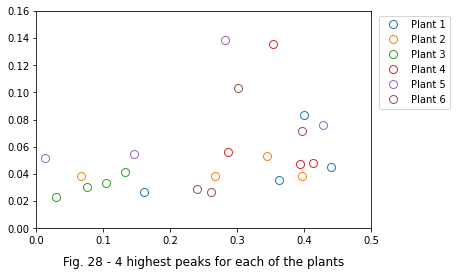

In [23]:
# Use analysis for the plants to show plots
for i in range(len(plants)):
    plant = plants[i]
    elem = elements[i]
    ratios, peaks = analysis_peak_finder(plant, elem, plots=False)
    plt.plot(peaks[:,0], peaks[:,1], mfc='none', ls='', marker='o', markersize=8, label=f'Plant {i+1}')
    
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xlim(0,0.5)
plt.ylim(0,0.16)
plt.title("Fig. 28 - 4 highest peaks for each of the plants", y=-0.2)
plt.show()

The 4 most prominent peak concentrations for each plant examples are shown in Fig. 28. Unfortunately, there is no clear pattern in the location or height of these peaks. This means that while the Fourier spectrum holds information about the sequence, each plant's sequence is widely different.

The next step of this analysis is to quantify how well two different spectrums agree. This will be used to quantify how much a given sequence compares to a known plant sequence, i.e. tells us how close something may resemble a plant.

#### 5. Quantitative comparison of two spectrums

Now, the challenge is to know which peaks from one power spectrum can be compared to which peaks from another power spectrum. Each peak has a unique frequency, $f$, and height, $h$. When comparing two spectrums, the sum of the percent difference will be used, $$X = \Delta f + \Delta h$$ where the difference in the frequency and heights are comparing the peak of one spectrum to another from a different spectrum. If the two spectrums match perfectly, then $X=0$. The objective will be to minimize $X$ to quantify how well the two spectrums agree.

The compare_peak_f_h function calculates $\Delta f$ and $\Delta h$ for each 4 peaks of one spectrum compared to all other 4 peaks of the other spectrum, returning a total of 16 differences in f and h. The first minimization problem is in finding which peaks to compare to which. This problem turned out to be more challenging than expected, leading to too much computing time when comparing spectra with more than 4 peaks. Thus, we only use the 4 most prominant peaks in our analysis.

Explanation of the code: First, all possible combinations of peaks are calculated using the comb_4x4 function. This was the limiting function in our analysis for sets of peaks larger than 4. To simplify the problem further, we use only the frequency of the peaks as it contains well understood information about the sequence of the plant. The compare_fourier_peaks function calculates $X$ for each combination and returns the minimum value found, which is the best combinations of peaks. Lastly, we use compare_fourier_full as a wrapper function to return the $X$ value, Note that a weight factor, $w$,  is added to control how much the height of the peaks affect X. If $w=0$, then only the frequency is compared and if w>>1, only the height of the peaks is relevent in the X calculation (but not the in peak matching which is done using frequency only)

In [24]:
def compare_peak_f_h(P_compare, P_check):
    '''
    Compare the freq. and height of peaks P1 to P2
    Args:
        P_compare (ndarray) : peak frequency and heights to compare to
        P_check (ndarray) : peak frequency and heights to compare with
    Returns:
        freq_diff_input (ndarray) : difference in peak frequencies
        h_diff_input (ndarray) : difference in peak heights
    '''
    freq_diff_input = np.zeros((4,4),float)
    h_diff_input = np.zeros((4,4),float)
    
    # compare to average of both values, to avoid problems if the peak compared to is much smaller, 
    # instead of just error compare to 'correct peak'
    
    for jj in range(4):
        for ii in range(4):
            freq_diff_input[ii,jj] = abs(P_compare[jj,0] - P_check[ii,0])*2 / (P_compare[jj,0]+P_check[ii,0])
            h_diff_input[ii,jj] = abs(P_compare[jj,1] - P_check[ii,1])*2/(P_compare[jj,1]+P_check[ii,1])
            
    return freq_diff_input, h_diff_input

def comb_4x4():
    '''
    Calculates the different combinations of location in 2D array for 4X4 array with no repeating row or column elements
    Note that 4x4 has total of 65000 combinations while 5x5 order 10^6, so decided for computational time to stop at
    the 4 most prominent peaks in the fourier spectrum.
    
    Args:
        None
    
    output:
        select () : coordinates needed to check minimum combinations for peaks in the Fourier spectrum
    '''
    # get all possible coordinates
    tmp = [0,1,2,3]
    coords = np.array(np.meshgrid(tmp, tmp)).T.reshape(-1, 2)

    #now select all possible pairs of coordinates:
    select_all = []
    for ii in range(len(coords)):
        for jj in range(len(coords)):
            for kk in range(len(coords)):
                for ll in range(len(coords)):
                    select_all.append([coords[ii],coords[jj], coords[kk], coords[ll]])

    select_all = np.array(select_all)

    #now only pick the coordinates of interest:
    #remove coordinates with repeated row or column numbers:
    select = []
    for ii in range(len(select_all)):
        if select_all[ii,0,0] == 0 and select_all[ii,1,0] == 1 and select_all[ii,2,0] == 2 and select_all[ii,3,0] == 3: #this allows to only select if 1st coord is in 1st row and 2nd coord in 2nd row
            #now if statements for 'y' part
            if select_all[ii,0,1] != select_all[ii,1,1] and select_all[ii,0,1] != select_all[ii,2,1] and select_all[ii,0,1] != select_all[ii,3,1]: #compare to 0 input to 1 and 2 and 3
                if select_all[ii,1,1] != select_all[ii,2,1] and select_all[ii,1,1] != select_all[ii,3,1]: #compare 1 input to 2 and 3
                    if select_all[ii,2,1] != select_all[ii,3,1]: #compare 2 input to 3
                        select.append(select_all[ii])

    select = np.array(select)
    return select

coord_4x4 = comb_4x4() #keep this calculation outside functions since only needs to be done once ==> code ran 10X faster!

def compare_fourier_peaks(P_compare_2, P_check_2, w=0.2):
    '''
    Compare the 4 most prominent peaks of two fourier spectrum and return a single scalar to quantify 'goodness'
    
    Args:
        P_compare_2: set of 4 peaks information (freq and height) 
        P_check_2: set of 4 peaks information (freq and height) Note that because of the way the goodness is coded,
                    it does not matter which spectrum is compare and which is check
        w (optional): Weight of the Fourier 
    
    Returns:
        X_tot: scalar quantifying goodness of 'fit' of fourier spectrum to another fourier spectrum
    '''
    freq_diff, h_diff = compare_peak_f_h(P_compare_2, P_check_2)
    
    # Now find matching 4 peaks by looking at frequency only (not height since more interested in frequency of patterns)
    # have freq_diff which is 4x4 array with each entry as a comparison to another peak
    # have all possible coordinates

    # now also have coord_4x4 which has each entry being a set of coordinates for the 4x4 freq_diff with no repeating peaks
    # so add up the entry of peak_diff , and compare all posible combinations (24 total for 4x4 matrix)

    # let X_freq quantify the goodness of the 'fit', which can be minimized to associate each peak from one fourier spectrum 
    # to the peaks from another fourier spectrum. X_freq will simply be the sum in the percent difference of the 4 peaks for
    # the selected combination

    X_freq = np.zeros(len(coord_4x4), float) # 24 possible combinations for 4x4
    for ii in range(len(coord_4x4)):
        X_freq[ii] = freq_diff[coord_4x4[ii,0,0], coord_4x4[ii,0,1]] + freq_diff[coord_4x4[ii,1,0], \
                               coord_4x4[ii,1,1]] + freq_diff[coord_4x4[ii,2,0], \
                               coord_4x4[ii,2,1]] + freq_diff[coord_4x4[ii,3,0], coord_4x4[ii,3,1]]

    # find minimum and the associated 'coordinates' for the 4x4 matrix
    coord_min = coord_4x4[np.argmin(X_freq)]

    # now calculate a goodness X_tot (scalar) which includes both the freq. and height (note that the height was not included in the min fitting 
    # since it is not as impotant as the freq.

    # add a weigth factor to the height, w
    X_h_min = h_diff[coord_min[0,0], coord_min[0,1]] + h_diff[coord_min[1,0], \
                    coord_min[1,1]] + h_diff[coord_min[2,0], \
                    coord_min[2,1]] + h_diff[coord_min[3,0], coord_min[3,1]]
    X_freq_min = freq_diff[coord_min[0,0], coord_min[0,1]] + freq_diff[coord_min[1,0], \
                        coord_min[1,1]] + freq_diff[coord_min[2,0], \
                        coord_min[2,1]] + freq_diff[coord_min[3,0],coord_min[3,1]]

    X_tot = w*X_h_min + X_freq_min
    
    return X_tot

def compare_fourier_full(plant_A, elems_A, plant_B, elems_B, w2=0.2):
    '''
    Put the previous analysis into a single function, to be used many times for analysis of randomly generated rules
    Args:
        plant_A (str) : sequence of elements representing an L-System
        plant_B (str) : sequence from a different L-System
        w2 (float) : weight to be given to the height of the peaks
    Returns:
        Output from the compare_fourier_peaks function
    '''
    
    R_plants_A, P_compare_input = analysis_peak_finder(plant_A, elems_A)
    R_plants_B, P_check_input = analysis_peak_finder(plant_B, elems_B)
    # note that the ratio is not important for this analysis of the fourier spectrum, however it is
    # saved in case want to make some analysis which includes the ratios

    return compare_fourier_peaks(P_compare_input, P_check_input, w=w2)

#### 6. Quantitative comparison of all plant examples relative to each other

Now, we want to compare each of the known plants to each other to see if there is a similarity in their Fourier spectrums. This could tell us what rules will give similar results. 

In [25]:
plant_comparison = np.zeros((6,6),float)
for i in range(len(plants)):
    for j in range(len(plants)):
        plant_comparison[i,j] = compare_fourier_full(plants[i], elements[i], plants[j], elements[j])

print(plant_comparison)

[[0.         1.70029706 4.83484191 1.16872759 2.81710614 1.44586446]
 [1.70029706 0.         3.83960298 1.88509618 2.64896228 1.66510151]
 [4.83484191 3.83960298 0.         5.45738556 3.80360787 4.90899827]
 [1.16872759 1.88509618 5.45738556 0.         3.20614544 1.15248088]
 [2.81710614 2.64896228 3.80360787 3.20614544 0.         2.76417987]
 [1.44586446 1.66510151 4.90899827 1.15248088 2.76417987 0.        ]]


The printed results is a 6x6 matrix with each entry the $X$ value of comparison between two plants. As a check, the array should be diagonal since comparing plant 1 to 2 is equivalent to comparing plant 2 to 1, and the diagonal elements should be zero, since comparing plant 1 to 1 should be a perfect match.

This shows that the value of $X$ varies from ~0.5 to ~5.5 for the non-trivial plants. Thus, there was no clear match between the plants, as expected since no pattern was observed in qualitatively comparing their power spectrums. We note that both the height and frequency are normalized and since $X$ calculates the relative difference in these values, $X=1$ should indicate a relative difference of ~100%. Thus, $X=0.5$ can be interpreted as a relatively good match and $X=5.5$ is a relatively bad match.

In conclusion, there is no clear pattern in the Fourier spectrum between the different known plant examples. This means that when comparing an unknown sequence to a plant, we must compare to all 6 plant examples and find the closest match. We use the function below to do exactly this. 

In [26]:
def compare_to_all_plant_examples(plants, elements, rule_input, w3=0.2):
    '''
    Compare the randomly generated potential plant to all 6 examples, returning the lowest X_tot value
    Args:
        plants (listof Str) : plants that have already been grown for 5 iterations
        elements (listof Str) : possible characters in the plants
        rule_input (str) : self replicating rule 
    '''
    rule = {'F': [[rule_input, 1.]]}
    plant_new = LSystem(A='F', C=['+', '-', '[', ']'], V=['F'], R=rule, N=5)
    plant_new = plant_new.grow_my_child()
    plant_new_elems = ['F', '+', '-', '[', ']']
    
    X_tot_array = np.zeros(len(plants),float)
    
    for i in range(len(plants)):
        X_tot_array[i] = compare_fourier_full(plants[i], elements[i], plant_new, plant_new_elems, w2=w3)

    X_tot_min, closest_plant = np.min(X_tot_array), np.argmin(X_tot_array)
    return X_tot_min, closest_plant

### Random Rule Generation 

Now that the Fourier Analysis code has been written, we will attempt to generate a random rule for an L-System, then check if the resulting sequence has a low $X$ value. The hypothesis is that if $X$ is very low, then the spectrum matches one of the known plants, meaning that the random rule is more liekly to draw a plant. To simplify the problem, we use only a single variable ($V=F$) like those of plants a - c from Fig. 5 so that only a single new rule has to be generated. Furthermore, the axiom and constants will remain the same as plants a - c as well ($A=F$ and $C=+-[]$). We limit the length of the rule to be randomly chosen between 12 and 16 characters as well, since there are infinite possibilities otherwise. 

#### 1. Generating useful random rules

Requirements to generate random rules for single variable plants:
- Limited to single variable, F
- Constants: +, -, $[$, $]$
- Every $[$ needs a matching $]$
- No $]$ characters before a $[$ character
- Limit to single axiom, F
- Innermost layer of $[ ]$ must have an F character to be non-trivial
- Must be at least four F characters in the rule to be able to analyze (unlikely to happen but still a requirement nonetheless)

__Implementation__: First, a random seed is used so that the rule will consistently be the same (even if it is random). The rule is generated by selecting a rule size between 12 and 16 characters, as that is what occurs in the example plants. However, many of the randomly generated rules are not valid due to the requirements stated above. Since it is unlikely that a rule would be randomly generated that meets all of the above requirements, we modify it using the bracket_correction function. 

In [27]:
#note: generate with seed so always the same ONLY RUN IN ORDER FOR SEMI CONSISTENT OUTPUT
np.random.seed(4)

def bracket_correction(random_rule_input):
    '''
    Corrects an input rule according to the requirements listed above. Does not continue to generate a new rule until all criteria is met
    Args:
        random_rule_input (str) : random string from the set of elements that has sets of [ and ] brackets
    Returns:
        random_rule_output (str) : a rule that obeys the above requirements 
    '''
    random_rule = random_rule_input
    
    # first need to get rid of ] if appears before matching [
    count_bracket = 0
    random_rule_corrected = []
    for component in list(random_rule):
        if component != ']':
            random_rule_corrected.append(component)
            if component == '[':
                count_bracket = count_bracket + 1

        if component == ']':
            if count_bracket > 0:
                #add the ], and update the bracket count
                random_rule_corrected.append(component)
                count_bracket = count_bracket - 1

    # 2nd: need to add however many ] brackets needed at the end to match [ brackets:
    for tt in range(count_bracket):
        random_rule_corrected.append(']')

    random_rule = ''.join(random_rule_corrected)

    # Lastly, a closed bracket [] will not affect the drawing if no F within it (can have other things such as +,- as well, 
    # but need F too.
    # this is because if a branch instance is created, but nothing is drawn (by F), then the branch instance is closed 
    # and the drawing continues unchanged.
    # To do this, without asking for random generation of the whole string to have this since it would be too 
    # unlikely to have a rule meet all criterias randomly, we add an F between [] if no F present at a random location in []
    # ex: -F[+] ==> -F[F+] or -F[+F]
    # ex: -F[[-+]F] ==> -F[[-F+]F]
    # ex: -F[[-F]+] ==> unchanged! since F within both sets of []
    # check if F within brackets:
    start_check = []
    non_nested_brackets = []
    
    count = 0
    for component in list(random_rule):
        if component == '[':
            non_nested_brackets.append(''.join(start_check))
            start_check = []
        
        start_check.append(component)
        if component == ']':
            non_nested_brackets.append(''.join(start_check))
            start_check = []
            
    non_nested_brackets.append(''.join(start_check)) #append the last part of the string if does not end in ]  
        

    # have list broken into pieces, with some starting and ending with [] which need to have F added
    new_non_nested_brackets = []
    
    # now have a list of non_nested brackets, can modify to add F randomly in it:
    for tt in range(len(non_nested_brackets)):
        if len(non_nested_brackets[tt]) > 0: # in case the str is empty
            old_bracket_0 = list(non_nested_brackets[tt]) # look at one bracket
            if old_bracket_0[0] == '[' and old_bracket_0[-1] == ']': # only modify nested brackets
                new_bracket_0 = np.empty(len(old_bracket_0)+1,dtype=str) # make new copy with one extra element length to place F
                new_bracket_0[0] = old_bracket_0[0] # know that first is [
                new_bracket_0[-1] = old_bracket_0[-1] # last is ] always
                number_0 = len(new_bracket_0) - 2 # found how many spots can F occupy
                random_number_0 = np.random.randint(0, number_0) # pick a spot for F randomly
                new_bracket_0[1+random_number_0] = 'F' # put F in randomly choosen spot
                for ff in range(number_0-1): # place the old_bracket inner components back
                    for ee in range(len(new_bracket_0)):
                        if new_bracket_0[ee] == '': # check that empty then fill with component
                            new_bracket_0[ee] = old_bracket_0[ff+1]
                            break # once filled, break out of inner loop and place next component
                
                new_non_nested_brackets.append(''.join(new_bracket_0)) # save new nested bracket
            else:
                new_non_nested_brackets.append(non_nested_brackets[tt])

    random_rule_output = ''.join(new_non_nested_brackets)
    return random_rule_output


def rule_generator(character_min, character_max, seed=0):
    '''
    Generates a semi random rule, with a number of character set by function input,
    with at lest one F for non-trivial results, and only closed sets of brackets []
    NOTE: the number of characters for the rule can exceed max character number given
    (ex: [[[ randomly generated will be corrected to ]]])
    Args:
        character_min (int) : Minimum number of characters in the rule
        character_max (int) : Max number of characters in the rule
    Returns:
        random_rule (str) : semi random rule according to some of the requirements above
    '''
    if seed > 0:
        np.random.seed(seed)
    charac = list('F+-[]')
    prob = [0.2, 0.2, 0.2, 0.2, 0.2] #equal probability

    #generate random number of characters in rule
    number_of_characters = np.random.randint(character_min, character_max+1)

    #generate random rule
    random_rule = ''.join(np.random.choice(charac, number_of_characters, p=prob))

    random_rule = bracket_correction(random_rule) #use bracket correction function to have sensible rule which can be drawn and non-trivial
    
    #but this is too random, need at least 3F in it to draw something:
    #note that 1F leads to a string with a signle F at the end of iterations, so only draws a line in some direction
    #if 2F, string too short after 5 iterations (~340 characters) to analyse spectrum
    #use 3F to strart getting results with relevent fourier spectrums (~1330 characters)
    #note that unlikely to not have 3F already because of bracket correction function used, however need to guarenty more than 3F
    #3F is too small and can lead to problem with peak analyser
    #4F is loarge enough, also note that plant exemple rules use 5-8 F per rule
    
    check_F = True
    while check_F: #continue until an F is found
        count_F = 0
        #count the F
        for component in list(random_rule):
            if component == 'F':
                count_F = count_F + 1
        
        #check if at least 3 F:
        if count_F >= 4:
            check_F = False #false means that no new random rule will be generated
        
        if check_F:#set to true if less than 3 F in string, then remake a rule: 
            random_rule = ''.join(np.random.choice(charac, number_of_characters, p=prob)) #regenerate a rule since likely to get at least 3 F
            random_rule = bracket_correction(random_rule) #more likely to get at least 3F after corrction, and need to do corection everytime.
    
    return random_rule

#### 2. Compare two randomly generated rules

Let's try to compare two random rules! This will show we're on the right track, but we also need to see if $X$ is a good metric to determine if a given rule will create a viable plant. 

In [28]:
new_rule_good = rule_generator(1, 16)
new_rule_bad = rule_generator(1, 16) # happens to be in that order; checked by eye and 1st was good, 2nd was bad

# Constants for both plants
a = 0 # stochasticity
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
C = ['+', '-', '[', ']'] # constants
N = 5
length = 20
angle = 25.7

# grow the plants
good_rule = {'F': [[new_rule_good, 1.]]}
good_plant = LSystem(V=V, C=C, A=A, R=good_rule, N=N)
good_seq = good_plant.grow_my_child()
             
bad_rule = {'F': [[new_rule_bad, 1.]]}
bad_plant = LSystem(V=V, C=C, A=A, R=bad_rule, N=N)
bad_seq = bad_plant.grow_my_child()

#study how 'good' vs 'bad' compare with the fourier analysis:
good_drawing = DrawFractal(current_iter=good_seq, fractal_type='fractal plant', length=length, angle=angle, a=a, pos=(0,0))
bad_drawing = DrawFractal(current_iter=bad_seq, fractal_type='fractal plant', length=length, angle=angle, a=a, pos=(0,0))

# weights of 1 
X_rule_good, close_good_plant = compare_to_all_plant_examples(plants, elements, new_rule_good, w3=1.)
X_rule_bad, close_bad_plant = compare_to_all_plant_examples(plants, elements, new_rule_bad, w3=1.)

print('The randomly generate rule', new_rule_good, 'drew something that resembles a plant, with X =', X_rule_good)
print('The randomly generate rule', new_rule_bad, 'drew something that DOES NOT resembles a plant, with X =', X_rule_bad)

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
The randomly generate rule F[-F+[F][FF]] drew something that resembles a plant, with X = 2.218199249185516
The randomly generate rule +[+F][+[F]FF] drew something that DOES NOT resembles a plant, with X = 2.3375313152430355


Two rules with 1 to 16 characters were randomly generated. Note that the random seed generation was selected so that one of these rules will draw something resembling a plant ('good'), and the other would not ('bad'). This step ensures that our drawing program and Fourier analysis code will work with the produced L-System sequence. 

We also note that something that resembles a plant is defined as something with branches that grows in roughly one direction. Here, the bad rule creates something that resembles sticks coming from the origin in every direction. Thus, it is not considered a plant. Now, we analyze this statistically such that we can see if $X$ remains an accurate metric to determine if the image is a plant. 

#### 3. Statistics on the randomly generated rules

Unfortunately, we are limited computationally when generating large datasets to analyze. The process of generating new rules is bottlenecked by the requirements we have imposed on a valid rule and the Fourier analysis of said rule. We are also limited analytically as we need to check each plant diagram by eye to make sure they resemble plants, given their metric. 

Due to our limitations, we will create 25 random rules (and associated plants) to analyze initially and quantify by eye. Then, 250 rules (and associated plants) will be generated, with only the top 10% (25 images, as determined by our metric, $X$) being kept. We will then analyze those by eye as well. 

The following code should not be run as it will not reproduce the same results. Example results are provide in Fig. 29. 

In [ ]:
new_rule_array = []
K = 25 #number of plots to draw
for h in range(K):
    new_rule_array.append(rule_generator(12,16)) # increase the minimum number of characters for more interesting results

# get the minimum X value
X_array = np.zeros(K, float)
for i in range(len(new_rule_array)):
    X_array[i], close_plant = compare_to_all_plant_examples(plants, elements, new_rule_array[i], w3=1.)
    
#keep the index to track and double check code
random_X = np.column_stack((np.array(np.linspace(0, K-1, K), int), np.array(new_rule_array), X_array))

# Constants
a = 0 # stochasticity
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
C = ['+', '-', '[', ']'] # constants
N = 5
length = 10
angle = 25.7

# Change this to True if you want to draw each image
draw = True

for i in range(len(new_rule_array)):
    rule = new_rule_array[i]
    
    R = {'F': [[rule, 1.]]}
    plant = LSystem(V=V, C=C, A=A, R=R, N=N)
    seq = plant.grow_my_child()
    
    if draw:
        drawing = DrawFractal(current_iter=seq, fractal_type='fractal plant', length=length, angle=angle, a=a, pos=(0,0))

    if i == 8: # only draw the entries which look like a plant
        drawing = DrawFractal(current_iter=seq, fractal_type='fractal plant', length=1.3, angle=angle, a=a, pos=(0,-230))
        print('Rule 8 resembles a plant, with the following rule:', rule, 'and X =', random_X[i, 2])
        
    if i == 21:
        drawing = DrawFractal(current_iter=seq, fractal_type='fractal plant', length=15, angle=angle, a=a, pos=(0,0))
        print('Rule 22 resembles a plant, with the following rule:', rule, 'and X =', random_X[i, 2])


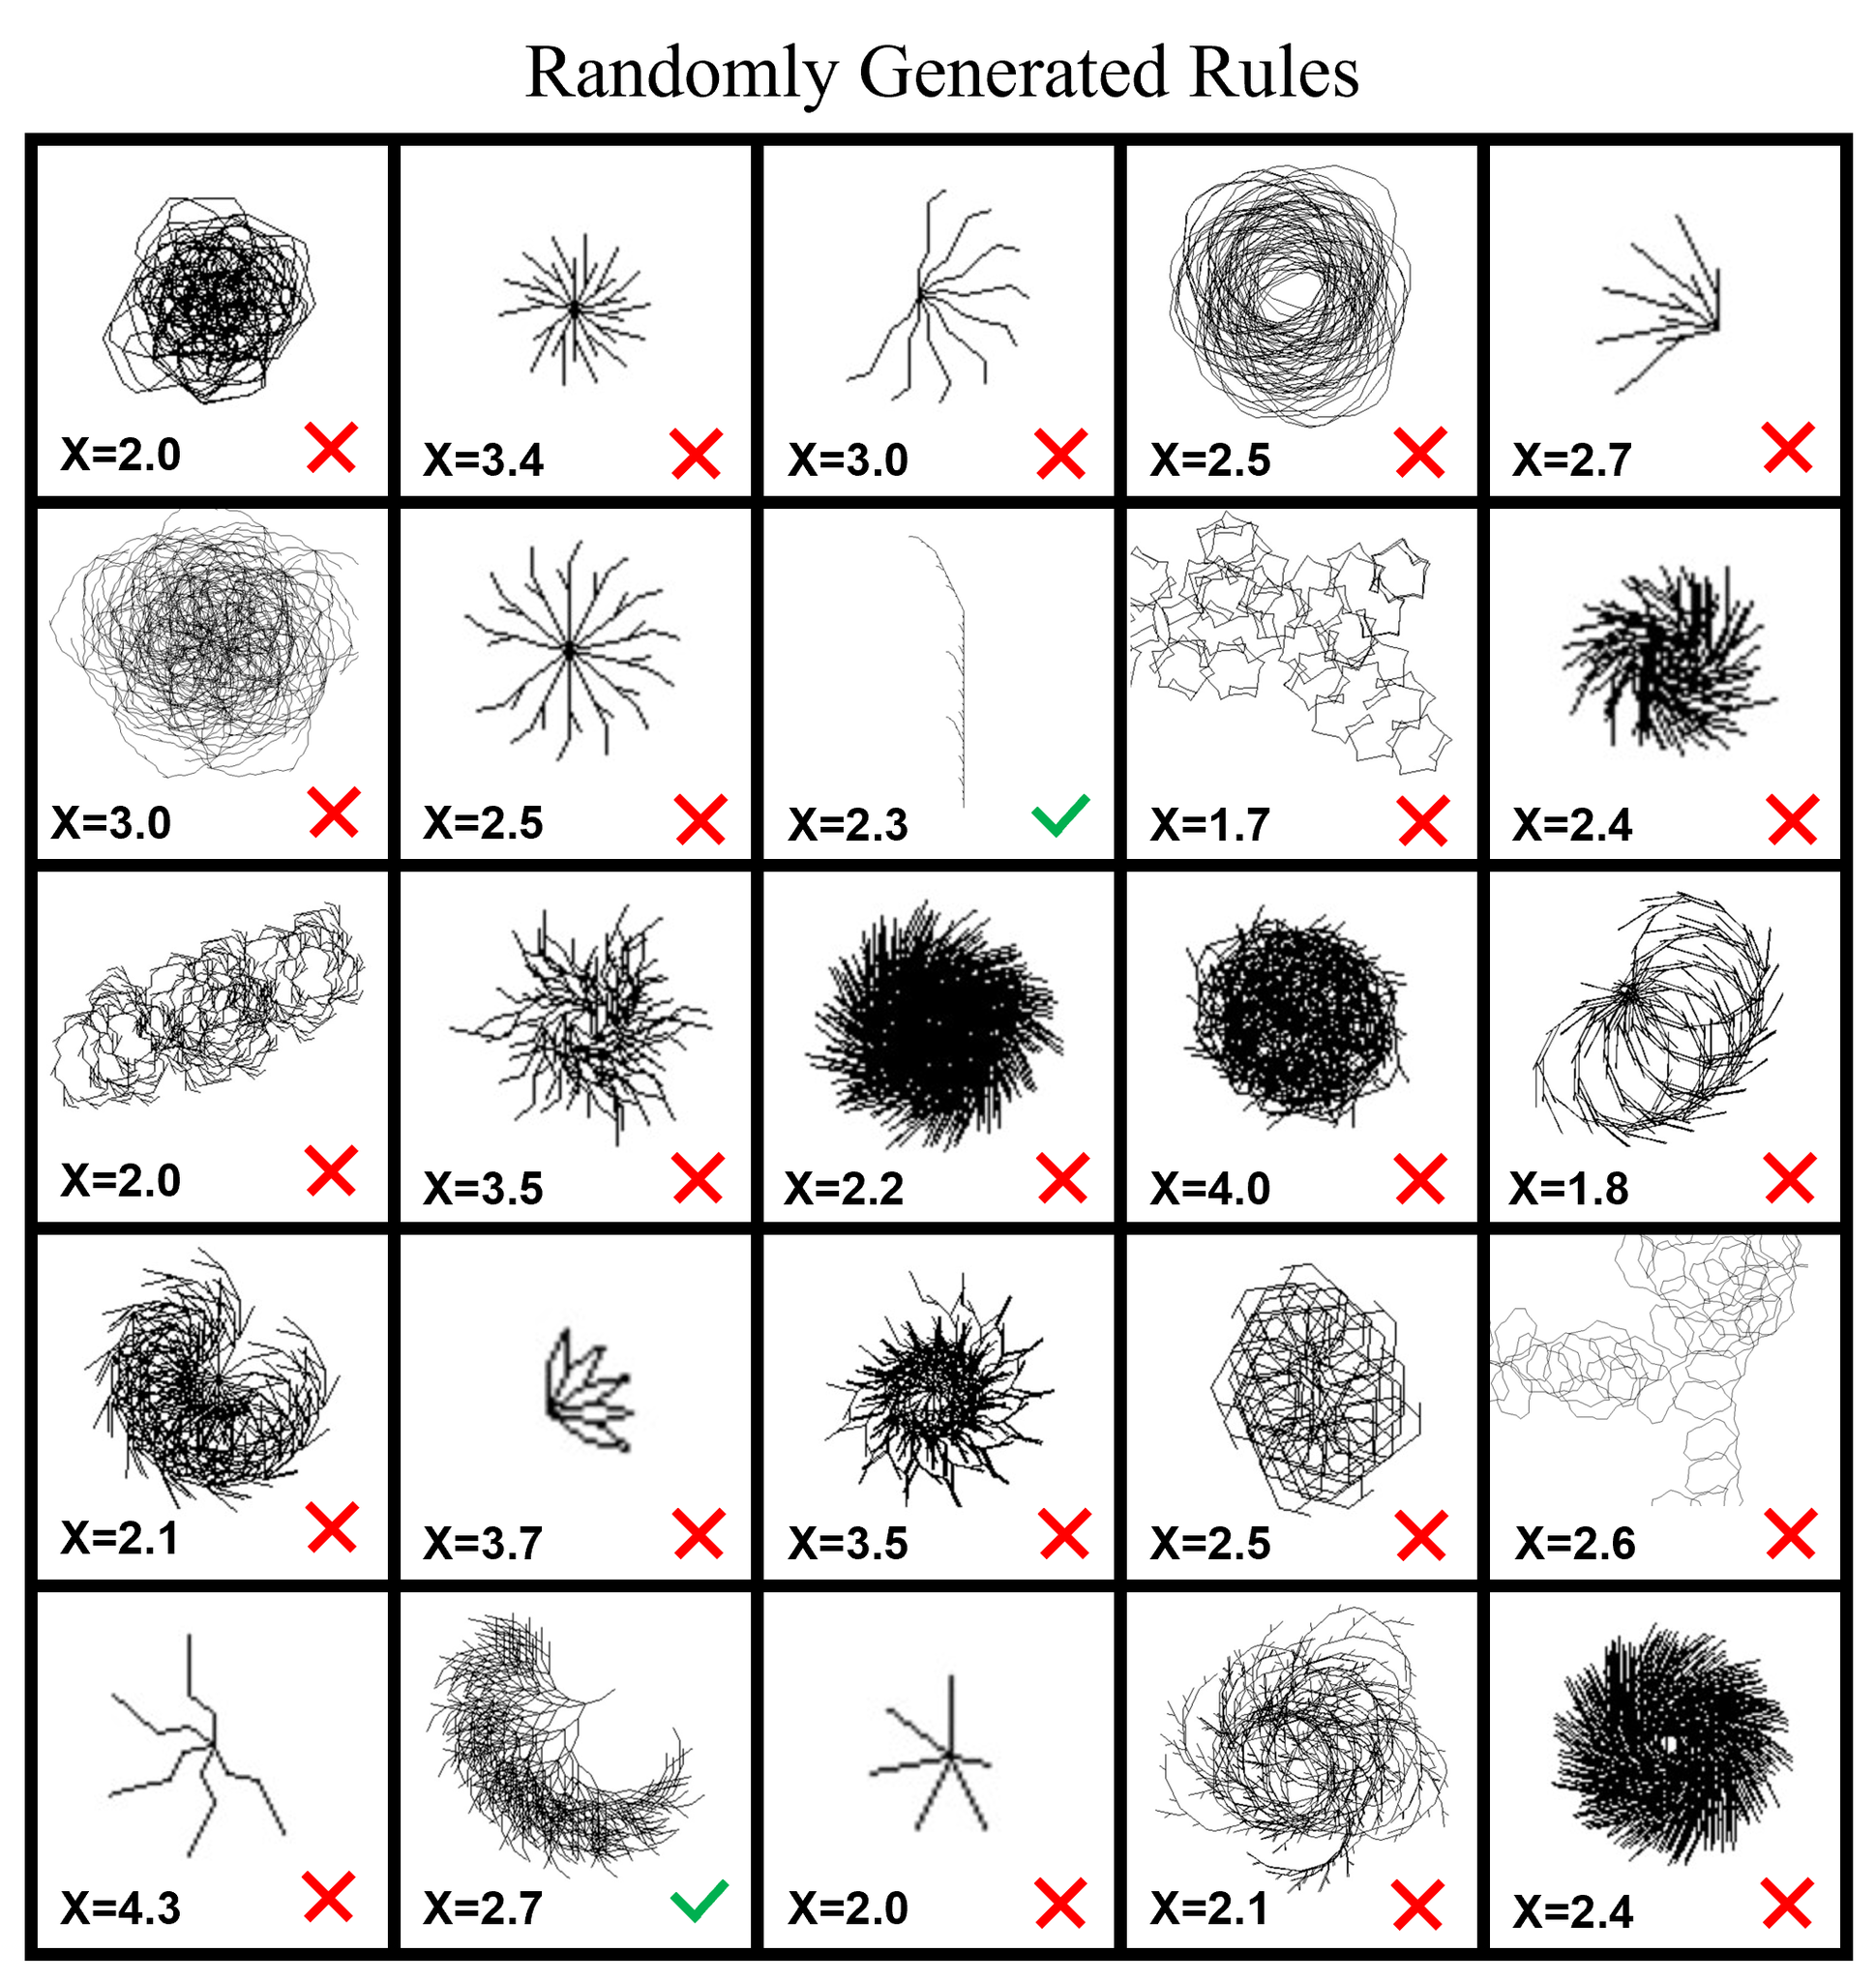 
Fig. 29 - Randomly selected rules for 25 L-Systems

These 25 drawn L-systems are all very random, demonstrated in Fig. 29. Only entries 8 and 22 resemble a plant. The associated X values are 2.3 and 2.7 respectively, which are relatively high. We also note that the orientation of the plant is not relevant in the definition of the plant.

#### 4. Analyzing the top 25 of a sample of 250 random rules

We now attempt to analyze 250 rules. Due to the large computational power required, it is not advised to run this on your own and due to the randomness of the seed, it will be impossible to replicate the results. However, some example results are provided and analyzed. 

In [ ]:
# now compare if generate 250, and select top 25 X values:

# create 250 new rules
new_rule_array_2 = []
M = 250
for i in range(M):
    new_rule_array_2.append(rule_generator(12,16)) #increase the minimum number of characters for more interesting results

X_array_2 = np.zeros(M, float)
for i in range(len(new_rule_array_2)):
    X_array_2[i], close_plant = compare_to_all_plant_examples(plants, elements, new_rule_array_2[i], w3=1.)

#keep the index to track and double check code
table_X_index = np.column_stack((np.array(np.linspace(0, M-1, M), int), np.array(new_rule_array_2), X_array_2))

#now select the top 25 rules with lowest X_tot values: 
#sort the table with first row being the lowest value of X_tot
sorted_table_X_index = table_X_index[np.argsort(table_X_index[:, 2])]

best_rules_from_X = sorted_table_X_index[:K, 1:]

# Constants
a = 0 # stochasticity
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
C = ['+', '-', '[', ']'] # constants
N = 5
length = 10
angle = 25.7

# Change this to True if you want to draw each image
draw = False

#draw the top 25 rules:
for i in range(len(best_rules_from_X)):
    rule = best_rules_from_X[i]
    
    R = {'F': [[rule[0], 1.]]}
    plant = LSystem(V=V, C=C, A=A, R=R, N=N)
    seq = plant.grow_my_child()
    
    if draw:
        drawing = DrawFractal(current_iter=seq, fractal_type='fractal plant', length=length, angle=angle, a=a, pos=(0,0))
        
    if i == 10:
        print('Image 10 resembles a plant, with the following rule:', rule[0], 'and X =', rule[1])
        drawing = DrawFractal(current_iter=seq, fractal_type='fractal plant', length=5, angle=angle, a=a, pos=(200,-200))
    if i == 11:
        print('Image 11 resembles a plant, with the following rule:', rule[0], 'and X =', rule[1])
        # drawing = DrawFractal(current_iter=seq, fractal_type='fractal plant', length=6, angle=angle, a=a, pos=(200,-200))
    if i == 16:
        print('Image 16 resembles a plant, with the following rule:', rule[0], 'and X =', rule[1])
        # drawing = DrawFractal(current_iter=seq, fractal_type='fractal plant', length=8, angle=angle, a=a, pos=(0,-200))
    if i == 20:
        print('Image 20 resembles a plant, with the following rule:', rule[0], 'and X =', rule[1])
        # drawing = DrawFractal(current_iter=seq, fractal_type='fractal plant', length=30, angle=angle, a=a, pos=(0,-50))

# note that this cell takes a long time to execute! 

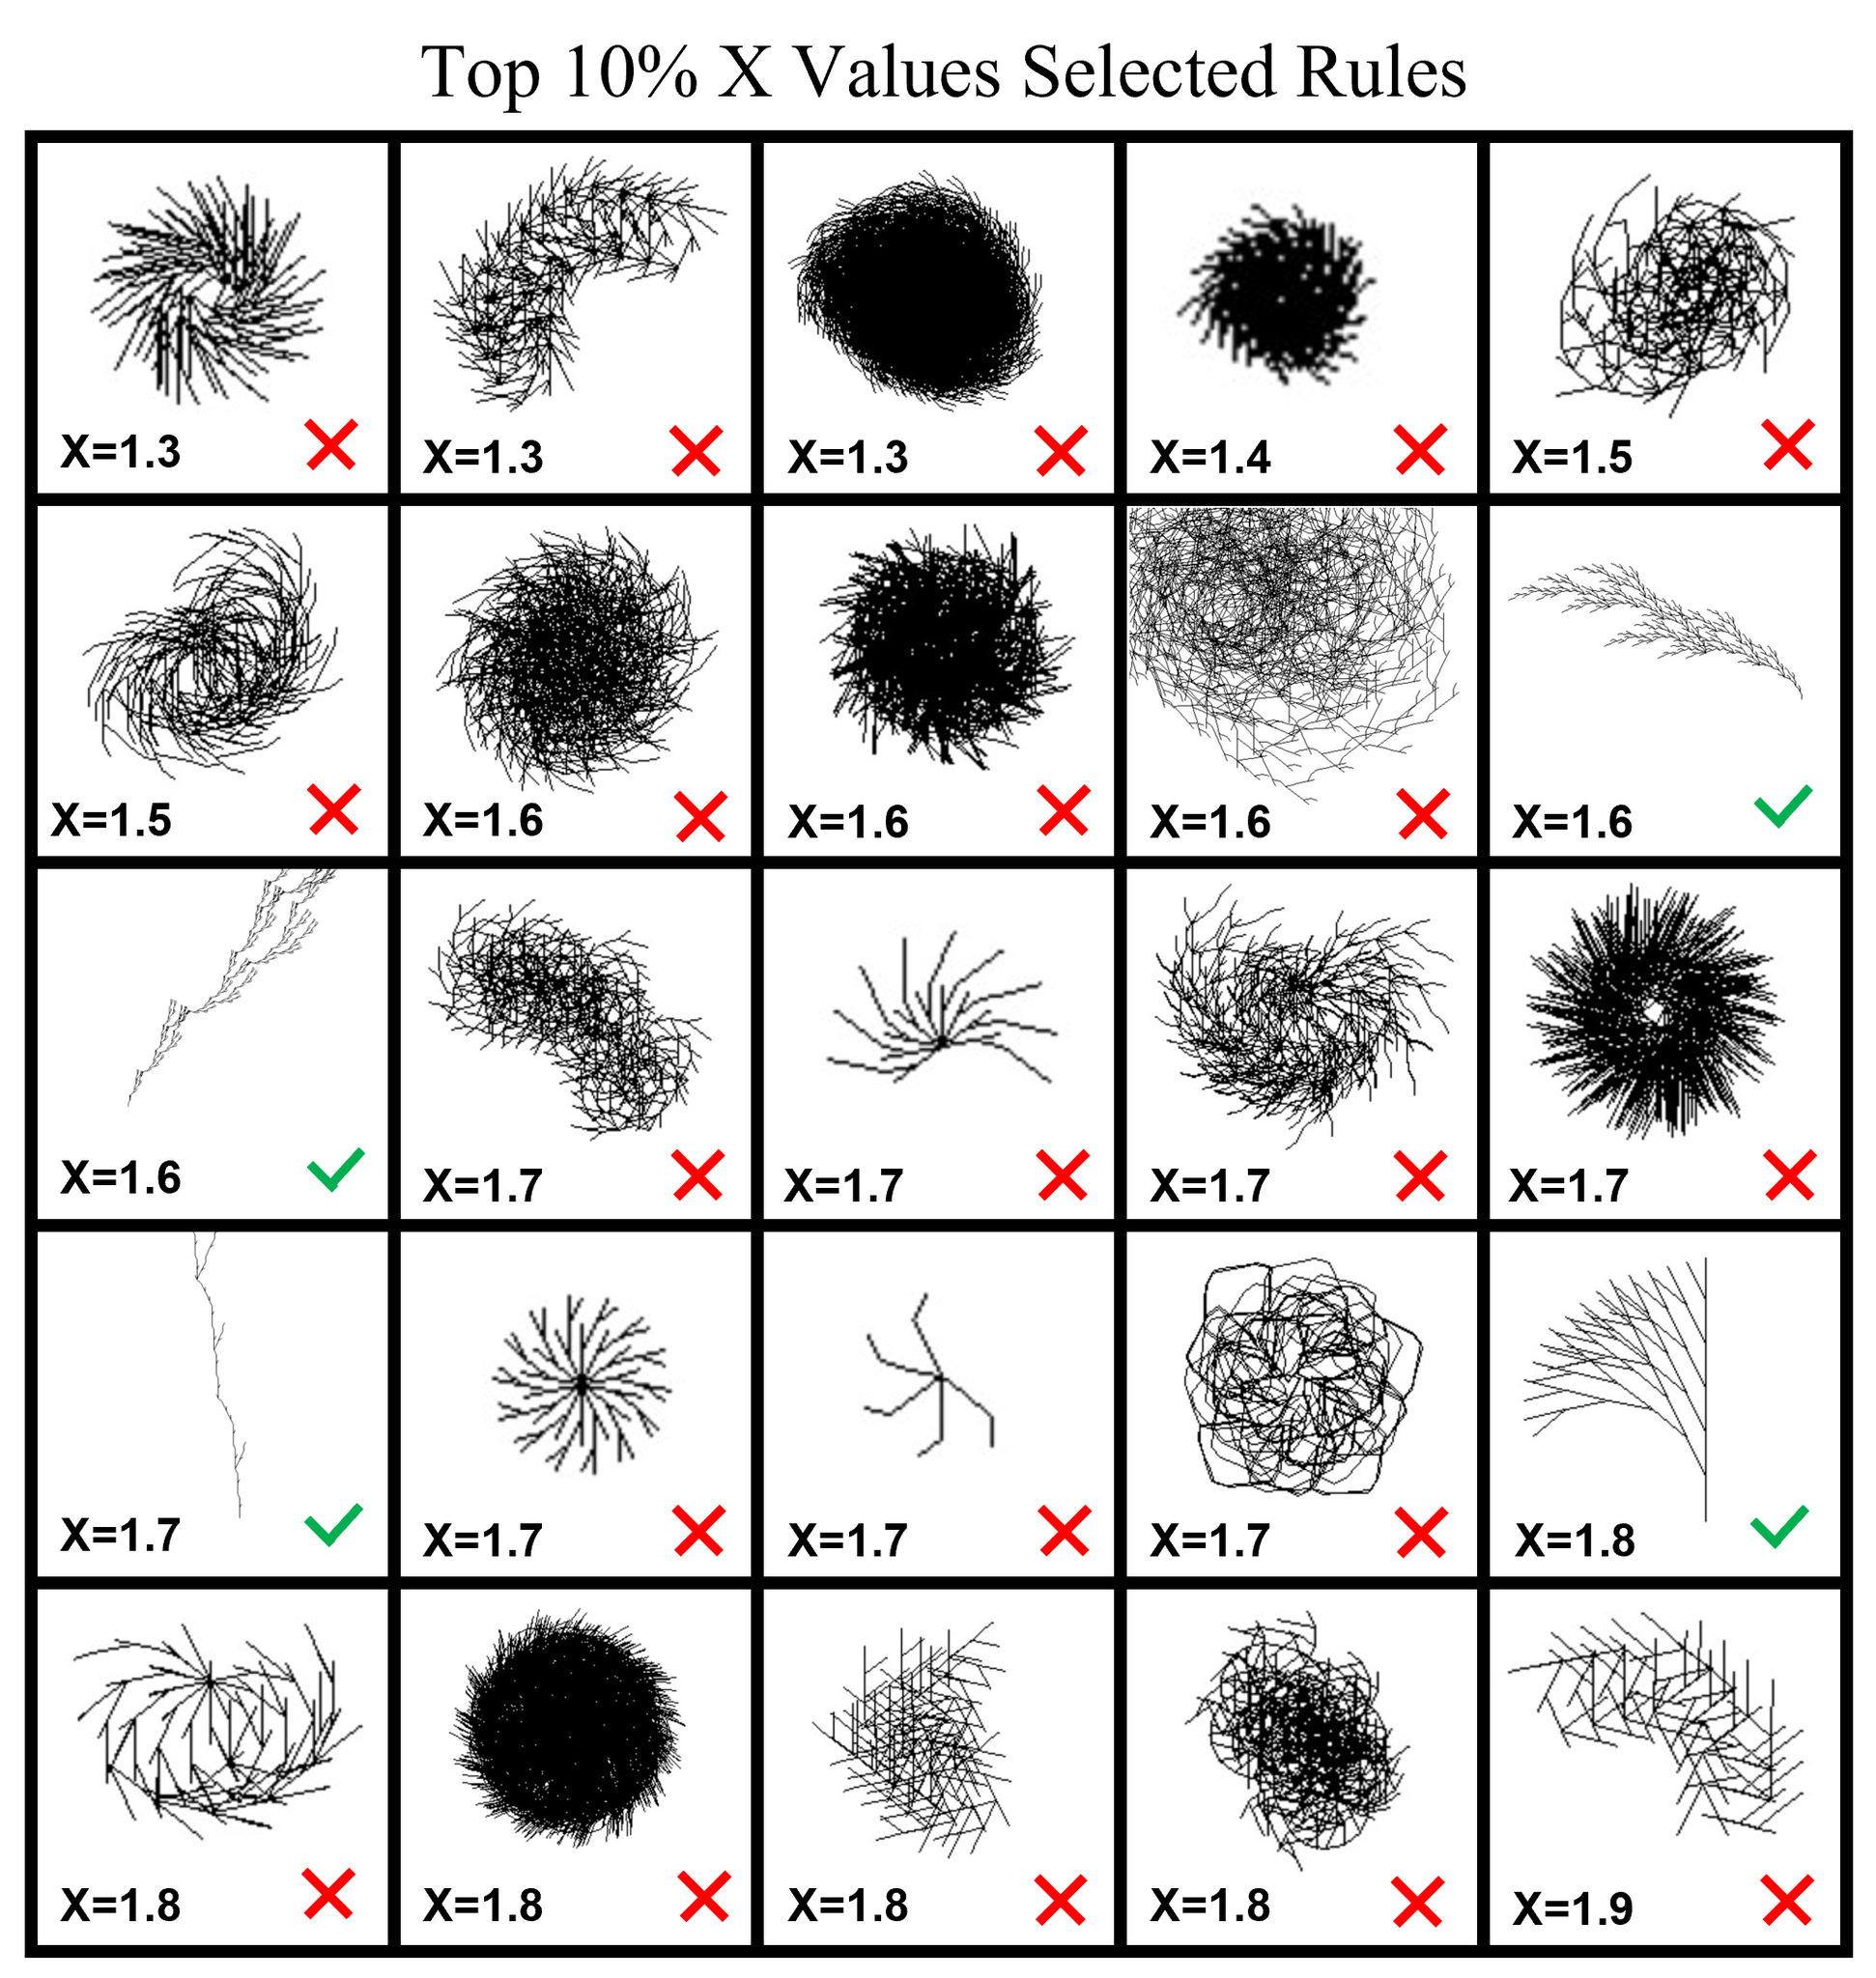
Fig. 30 - Top 25 plants according to the metric $X$ from a sample of 250 possible plants.

There are now 4 possible rules that resemble plants according to the $X$ metric for fully random rules, i.e. entries 10, 11, 16 and 22 resemble a plant. The associated $X$ values are 1.6, 1.6, 1.7 and 1.8 respectively, which are all relatively high. Fig. 30 is sorted in ascending order based on the $X$ metric, thus entry 1 is the top left and has the lowest $X$ value while entry 25 is the bottom right and has the highest $X$ value.

When taking the random rules, 8% (2/25) of them led to drawings of plants. When taking the top 10% (25/250) of the rules that generate the lowest $X$ values, we see an increase in number of rules that lead to more realistic drawings of plants (16% or 4/25). While this set is relatively small to be very conclusive, it hints that a lower $X$ value is more likely to generate a rule for a single variable L-system that leads to a realistic drawing of a plant!

### Remarks for Case Study #2

The Fourier spectrum analysis used in not enough to consistently quantify if a sequence is a realistic plant or not. However, the spectra contain information about the L-System and the analysis hints that statistically, the match of Fourier spectra to known plants using the metric $X$ may lead to finding more realistic plants (by possibly a factor of 2). Provided is a summary of this case study.

- Created a way to take the Fourier transform of a sequence of characters generated by an L-System, then quatified the peak concentrations in that Fourier spectrum.
- Found a way to compare Fourier spectrums by calculating a $\chi^2$ equivalent, called the $X$ metric, which needs to be minimized to find matching peaks.
- Analyzed and compared Fourier spectra of 6 example plants from Fig. 5, with no clear patterns in the 4 most prominent peaks found. 
- Coded a random, non-trivial rule generation for single variable L-Systems.
- Studied statistically whether or not the $X$ value helps to indicate if a rule will generate a realistic looking plant. Found that four random rules, ~8% will generate plants while for samples of which the top 10% of $X$ values are taken, ~16% of the rules will generate plants. 

Overall, only the statistical test hints that the Fourier spectrum and the $X$ values will help in finding rules to create realistic plants. However, we did thorough study of a very chaotic system, with small deviations in rules that led to widely different drawings that cannot be quantified by selecting the most relevant four peak concentrations in their Fourier spectrum. 

The next steps for the Fourier analysis case study would be to increase the size of the samples analyzed by eye to much greater than 25 L-Systems. Another important aspect is that we only compare the newly generated rules against 6 example plants. Since we can now generate rules that look like plants, we could potentially save the generated plants and add them to the example plants. This would vastly improve our measurement of $X$. The study could further be improved with a more complex peak analysis of the Fourier spectrum, rather than the simple 4 peak concentrations used. Any further analysis would require improving the speed of computation as what we have currently is extremely slow. One more tool we could use to classify each of the produced L-Systems as a plant or not a plant would be machine learning. This would drastically improve the classification compared to the simple $X$ metric and the study would benefit greatly from this. Unfortunately for now, finding new plants in a sea of vegetation is still like looking for a diamond in the rough!

## Conclusion

The case studies provided us with great insight into L-Systems, fractals and chaos. First, we were able to reproduce classic L-Systems found in literature. Extending the rules further, we were able produce unique plants using two methods of stochastic processes. This ensured that each plant is impossible to replicate and would be invaluable when a large number of plants of the same 'type' are needed, i.e. in procedural generation scenarios such as videos games and computer generated imagery (CGI) scenes in movies. The second case study showed the Fourier analysis of L-Systems and how to quantitatively compare them to other L-Systems using their power spectra.  We were also able to develop random rules and found that by minimizing a "goodness" metric, we were able to increase the number of realistic looking plants as compared to using random rules. This process could be significantly improved by using machine learning, but that is outside the scope of this project! 

## Next Steps

There are a multitude of next steps that can be found throughout the report. In addition to these, we would also like to note the combination of case studies 1 and 2. We could use the rule generation to add more possible rules to the stochastic processes with given probabilities and see how that system evolves. Then, we can Fourier analyze that L-System sequence to see how closely it resembles a plant we've already seen. This is only one of many possible directions that the project can progress in, and we hope that another group may continue our work!

## References

Springer-Verlag. (1996). The algorithmic beauty of plants. 